### Importing liabraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
np.random.seed(10)

### Importing dataset:

In [2]:
data = pd.read_csv('iris.data',names= ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class'])

In [3]:
data.head()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

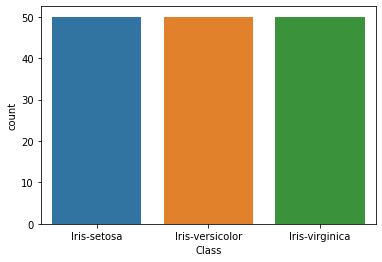

In [6]:
sns.countplot(data = data, x ='Class')
plt.show()

We dont have class imbalance issue.

In [7]:
data['Class'] = data['Class'].astype('category')

### preparing train, validation and test set for training:

In [8]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(data.Class.values.reshape(-1,1))

In [9]:
y.shape

(150, 3)

In [10]:
x = data.iloc[:,:4]

In [11]:
x = data.iloc[:,:4].to_numpy()
x.shape

(150, 4)

In [12]:
ds = np.concatenate((x,y),axis=1)

In [13]:
ds.shape

(150, 7)

In [14]:
np.random.shuffle(ds)

In [15]:
training_set = ds[:100]    # assigning 100 data points for training set
training_set.shape

(100, 7)

In [16]:
validation_set = ds[100: 130]     # assigning 30 data points for validation set
validation_set.shape

(30, 7)

In [17]:
test_set = ds[130:]            # assigning 20 data points for test set
test_set.shape

(20, 7)

In [18]:
train_x = training_set[:, :4]               
train_x = train_x.reshape((100, 4, 1))
train_x.shape

(100, 4, 1)

In [19]:
val_x = validation_set[:, :4]
val_x = val_x.reshape((30, 4, 1))
val_x.shape

(30, 4, 1)

In [20]:
test_x = test_set[:, :4]
test_x = test_x.reshape((20, 4, 1))
test_x.shape

(20, 4, 1)

In [21]:
train_y = training_set[:, 4:]
train_y = train_y.reshape((100, 3, 1))
train_y.shape

(100, 3, 1)

In [22]:
val_y = validation_set[:, 4:]
val_y = val_y.reshape((30, 3, 1))
val_y.shape

(30, 3, 1)

In [23]:
test_y = test_set[:, 4:]
test_y = test_y.reshape((20, 3, 1))
test_y.shape

(20, 3, 1)

### implementing simple neural network:

`BELOW NETWORK ARCHITECTURE AND DERRIVATIONS ARE KEPT SIMPLE FOR REFERANCE AND DOES NOT REPRESENT EXACT MODEL IMPLEMENTED IN THIS PROJECT. BUT THE SAME CONCEPTS CAN BE EXTENDED TO COMPLEX MODELS TO MEET OUR PROBLEM REQUIREMENT.`

*input layer ===> hidden layer_1 ===> hidden layer_2 ===> output layer*

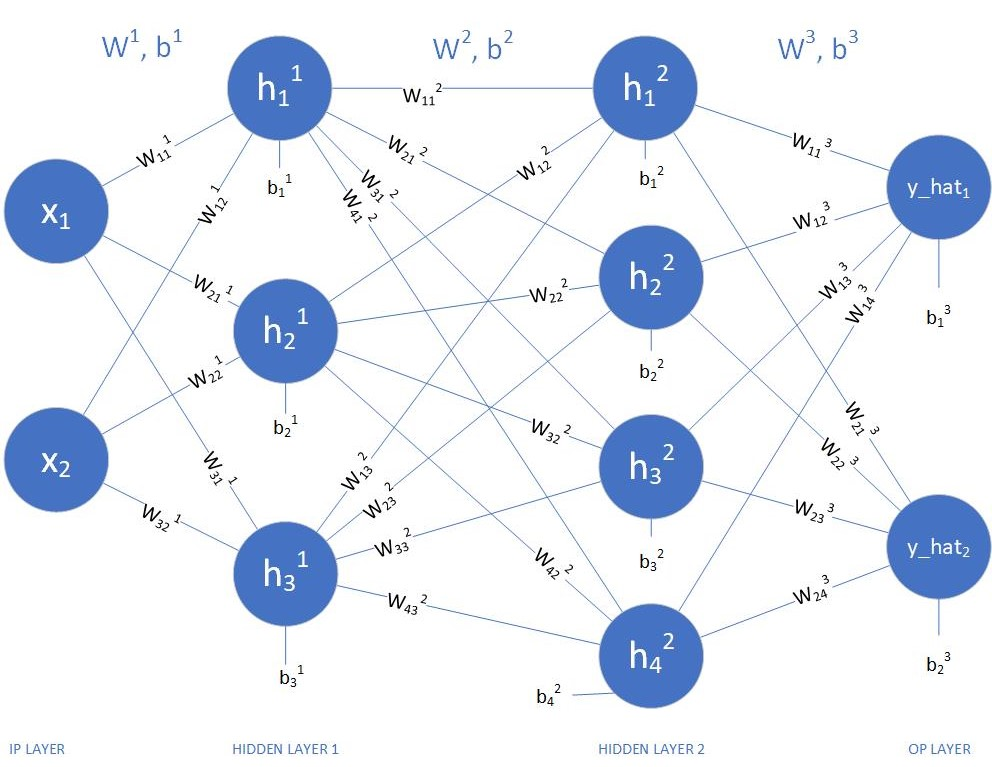

*We will consider relu as activation function for all hidden layers and for output layer activation function will be softmax function. And for Loss function we will use Categorical cross-entropy.*  

Our objective is to minimize the loss function. For that we will use gradient descent.

ReLu and its derrivative:

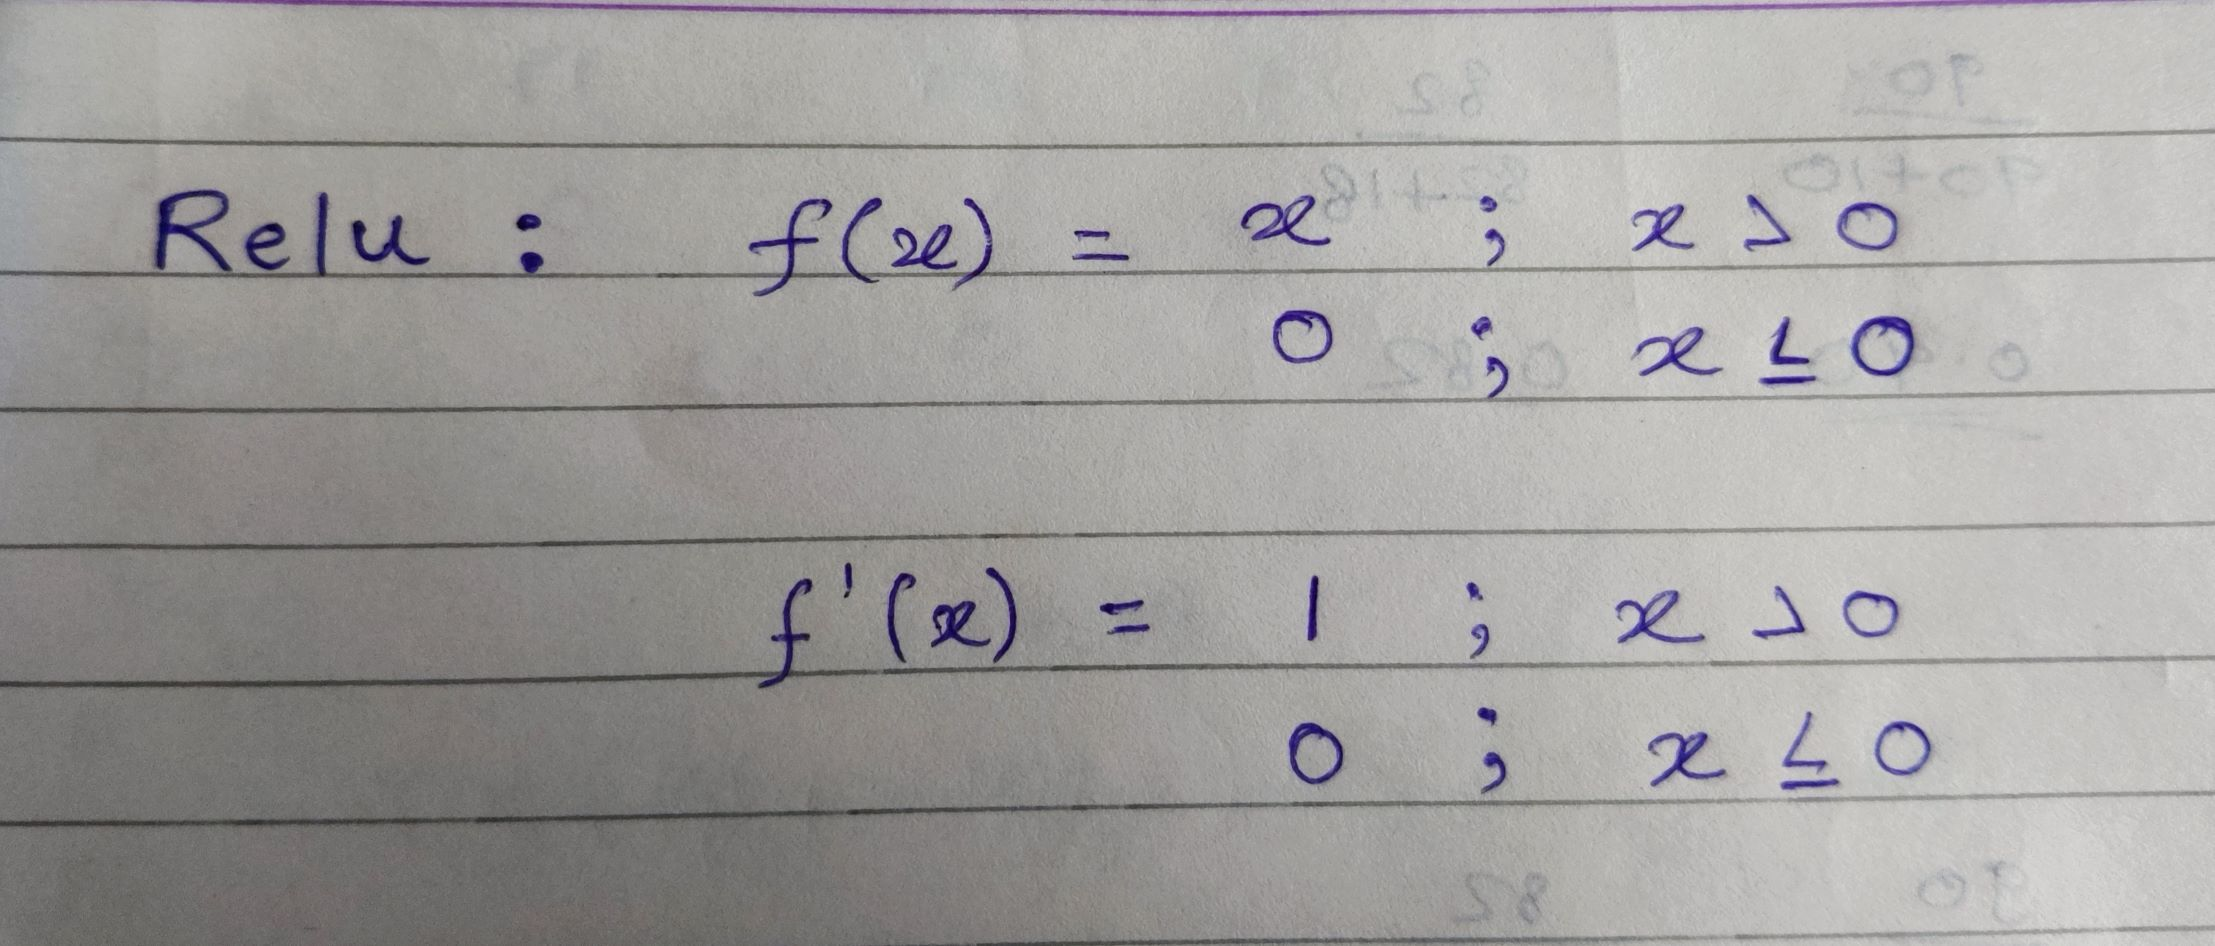

Softmax and its derrivataive:

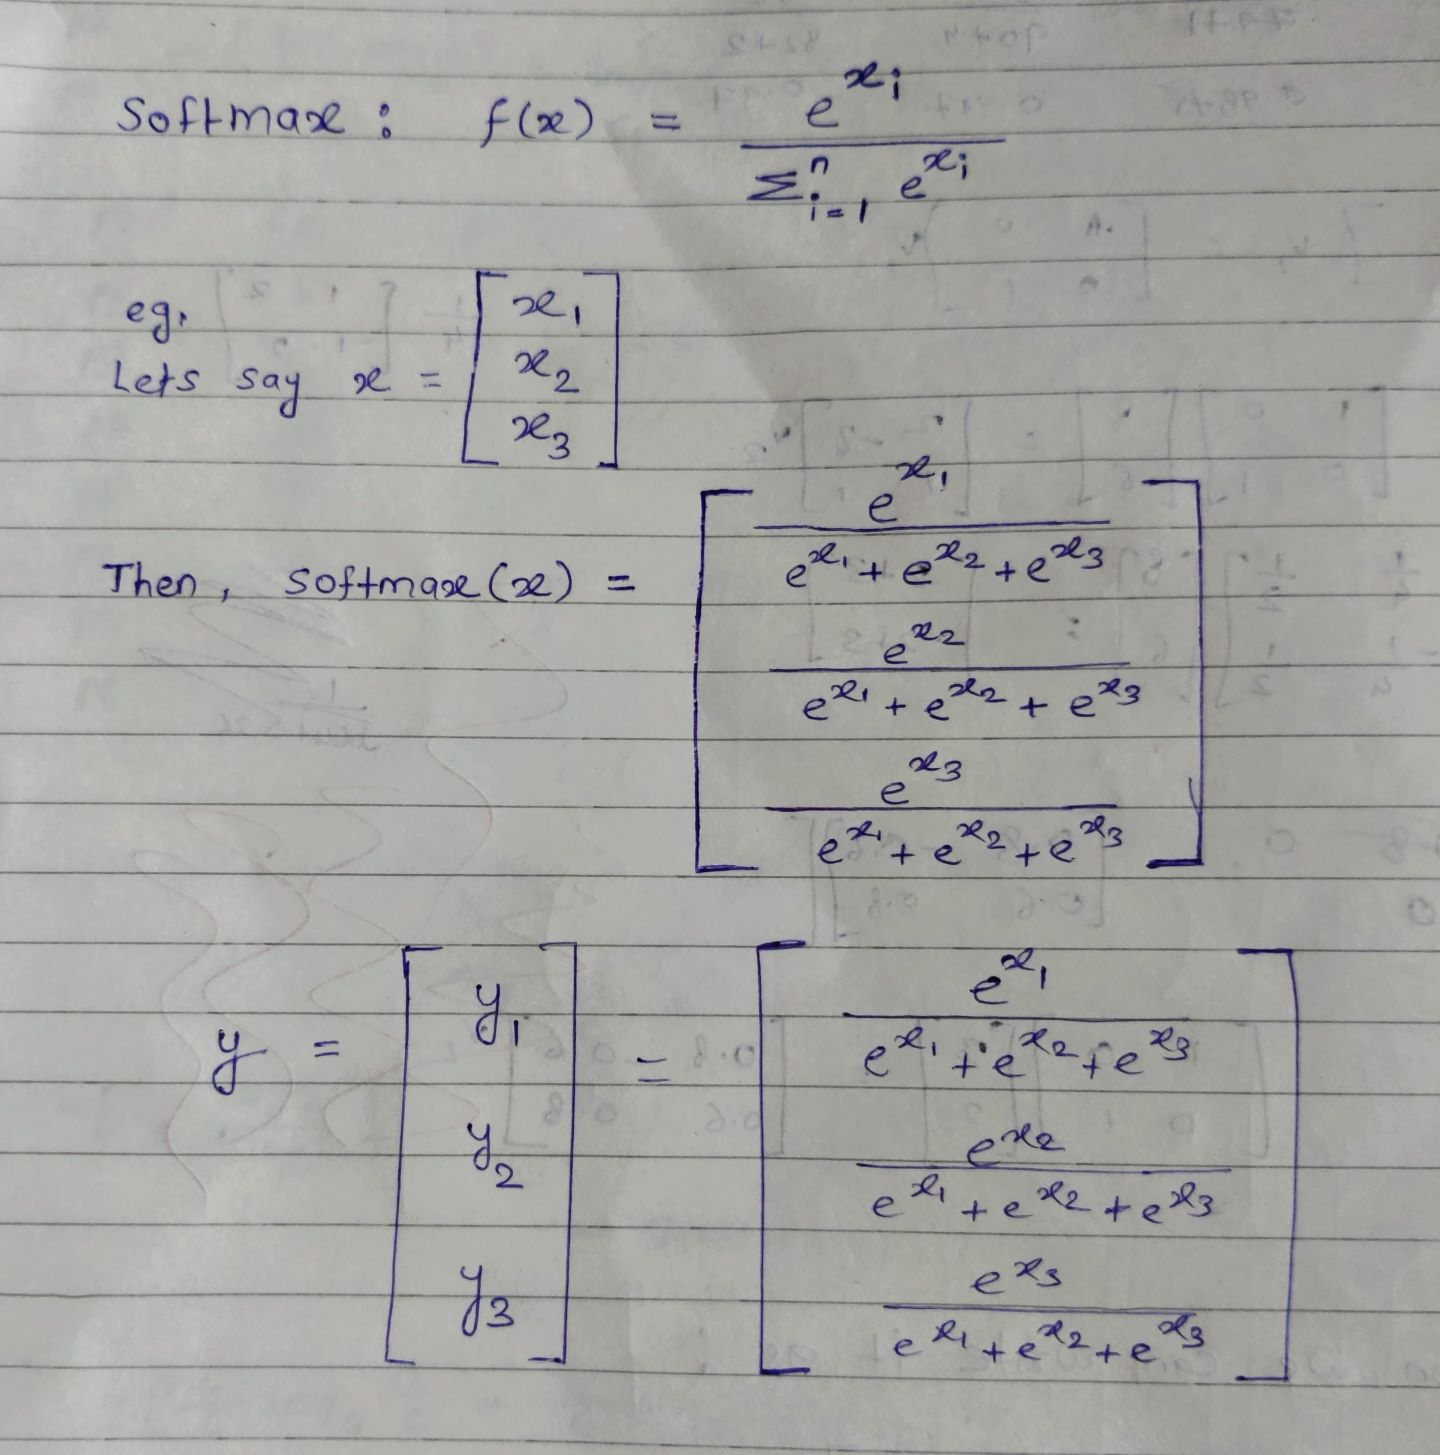

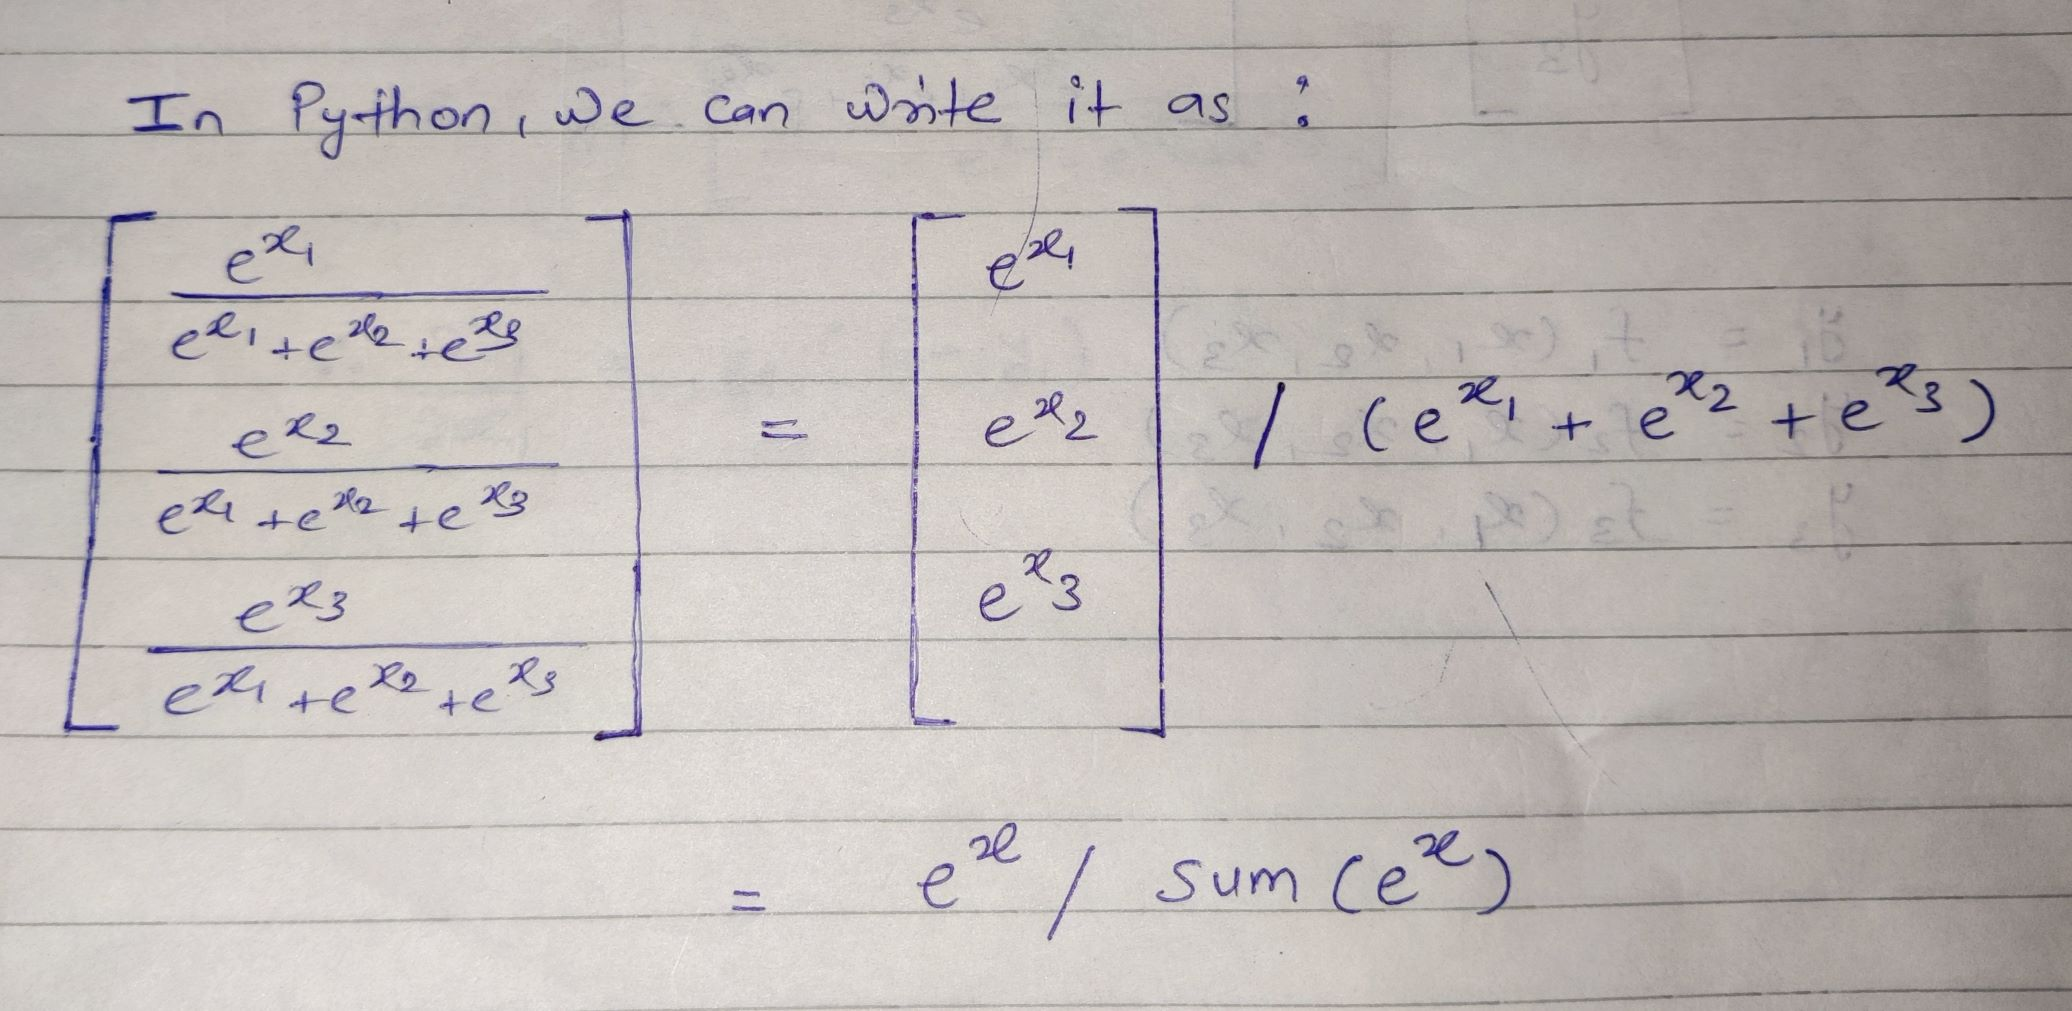

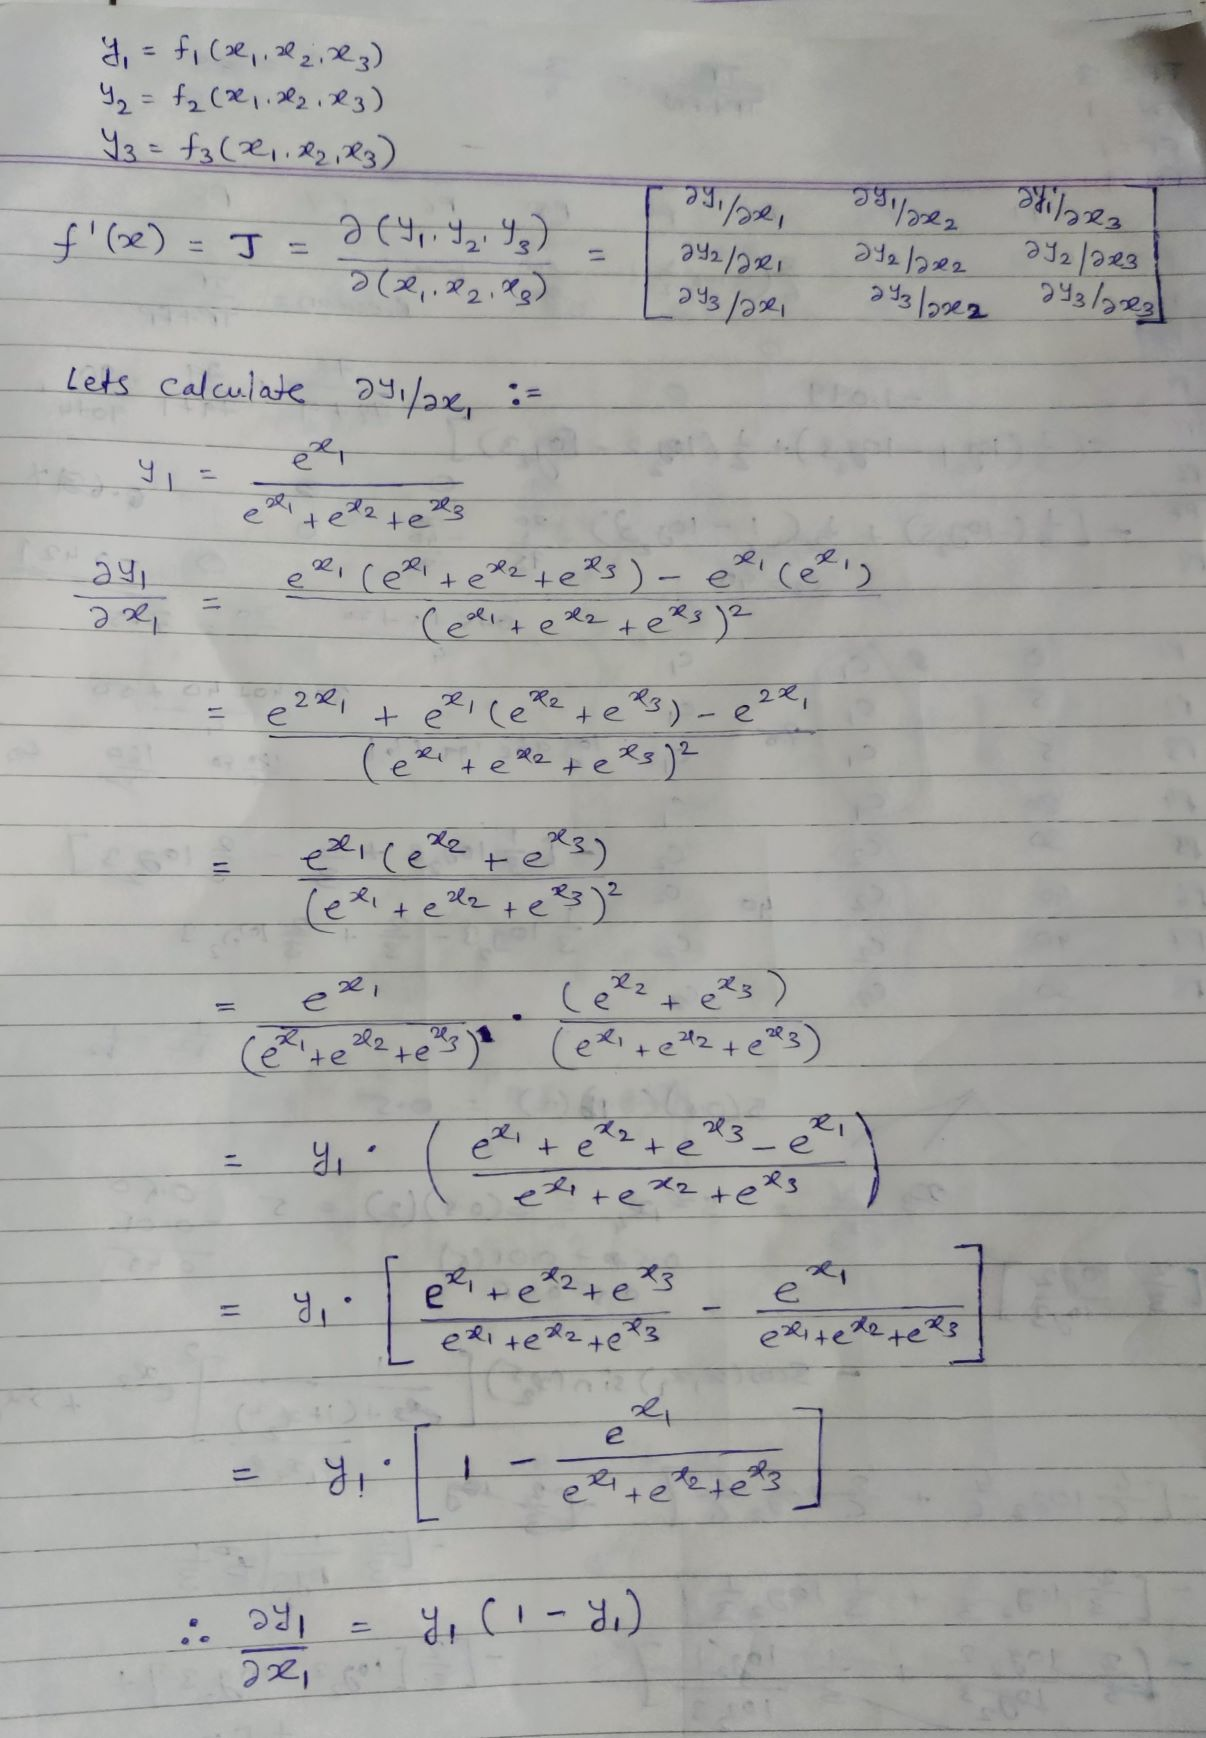

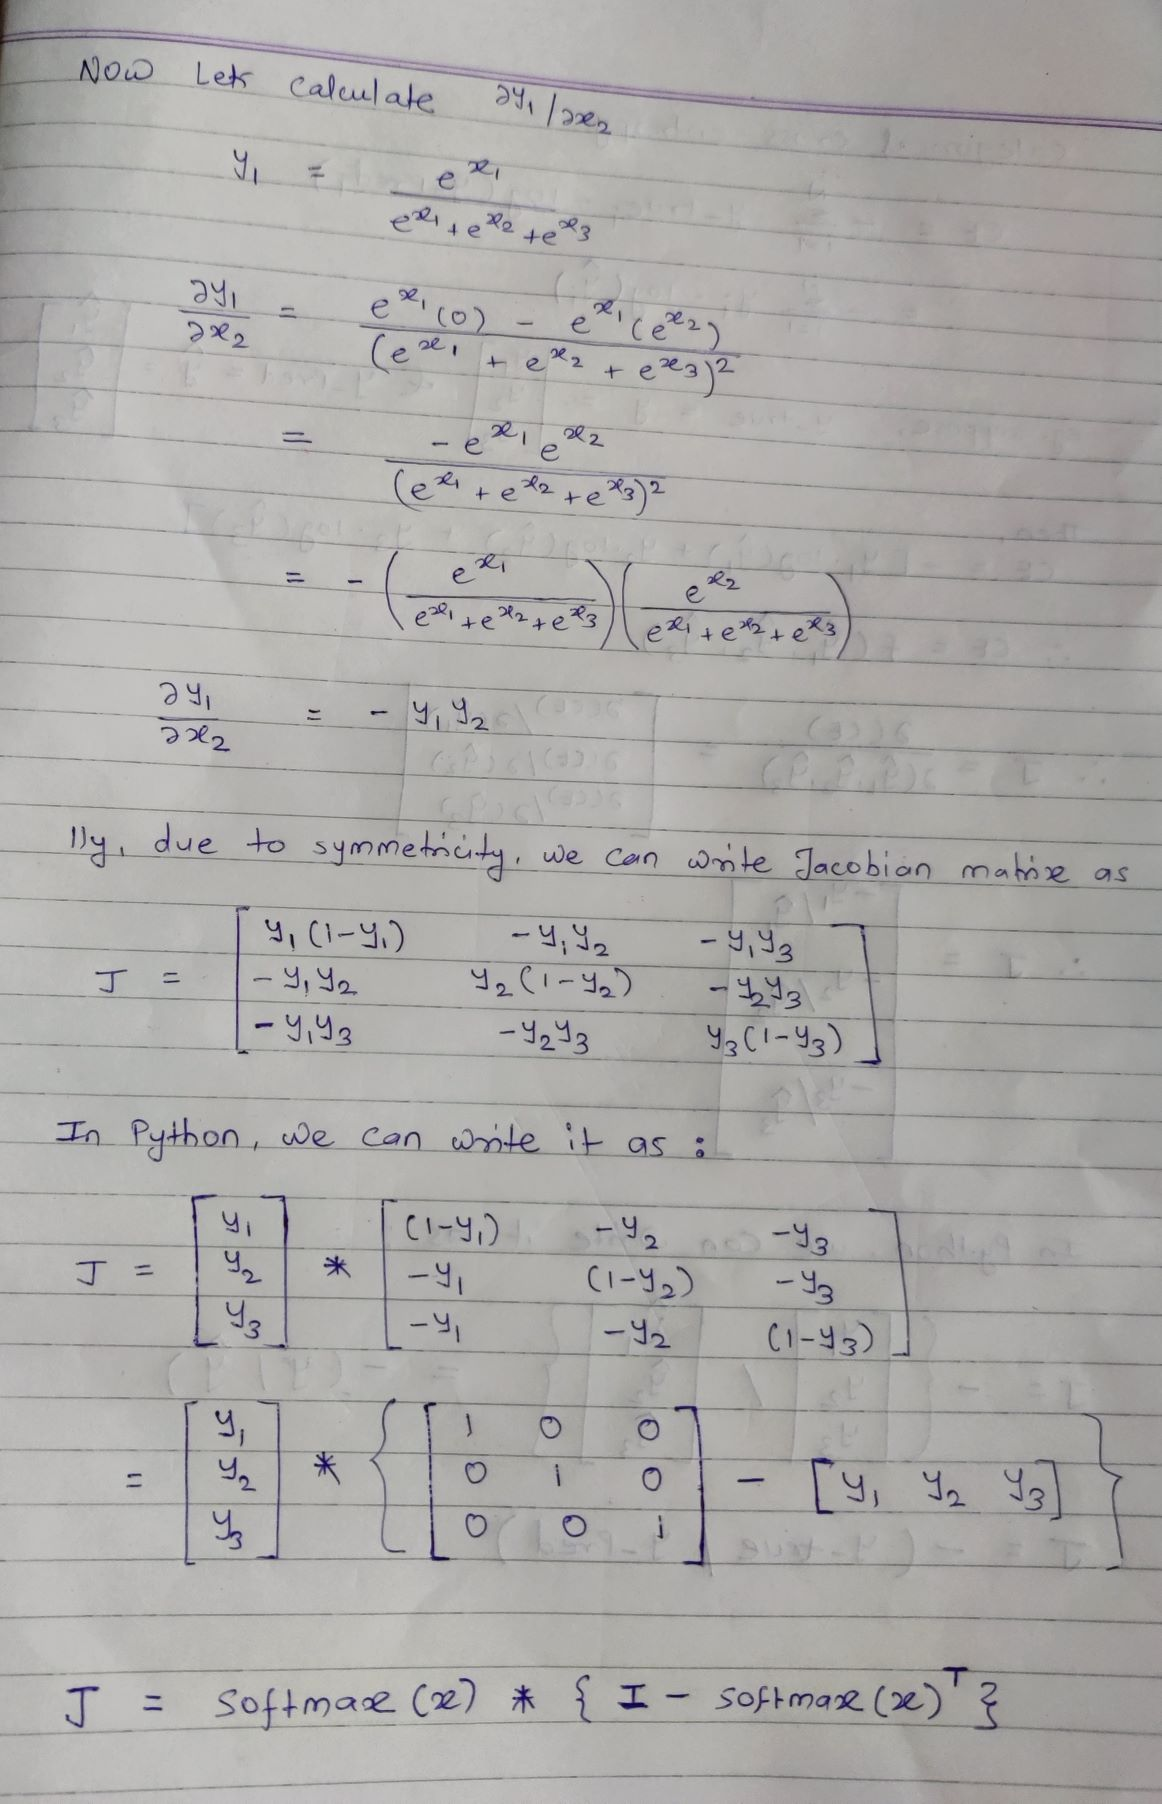

Categorical cross-entropy and its derrivative:

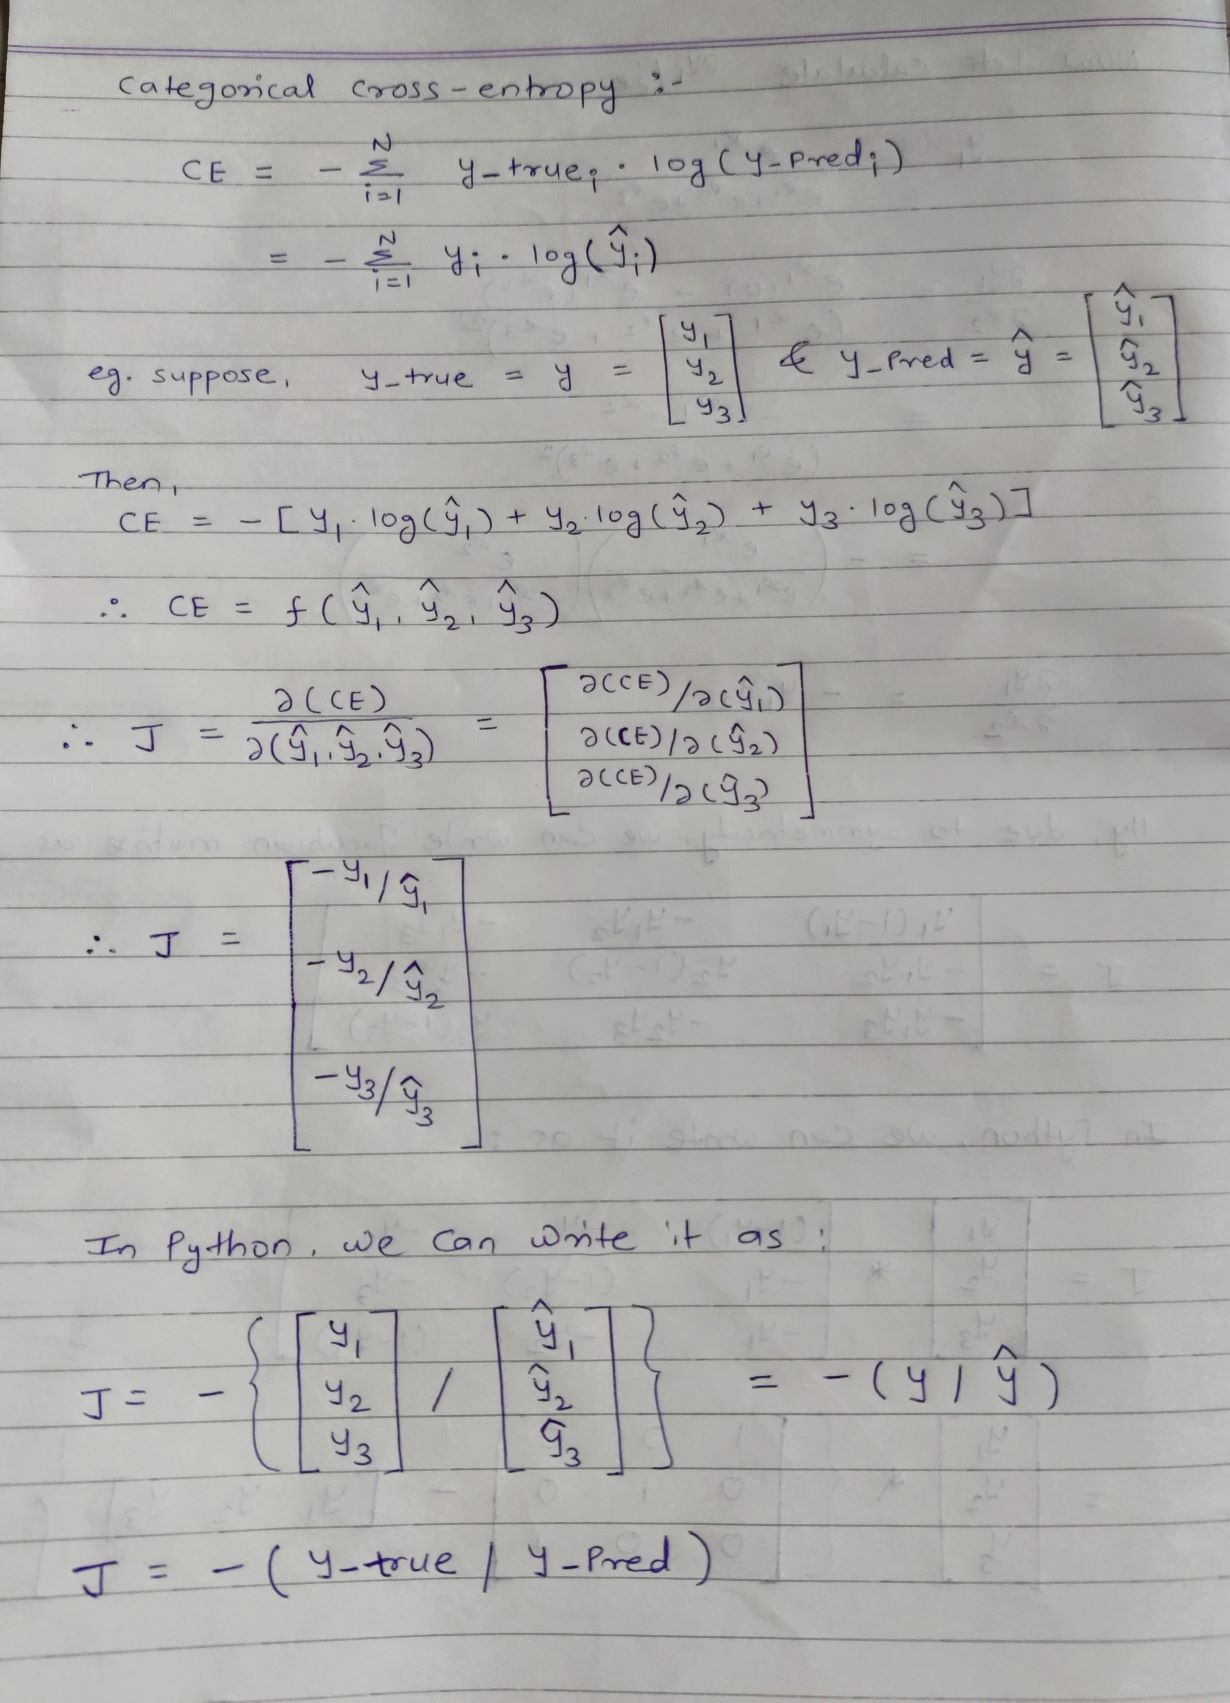

Adam optimizer: <br>
`Adam stands for Adaptive Moment Estimation. It is an update to RMSprop. In this method, we store gradients and squares of gradients in a restricted manner and we refer them as first moment and second moment respectively. The bias correction was included in first and second moment in the original paper but we will include it with decay rates in the learning rate and call it as learning rate hat.`

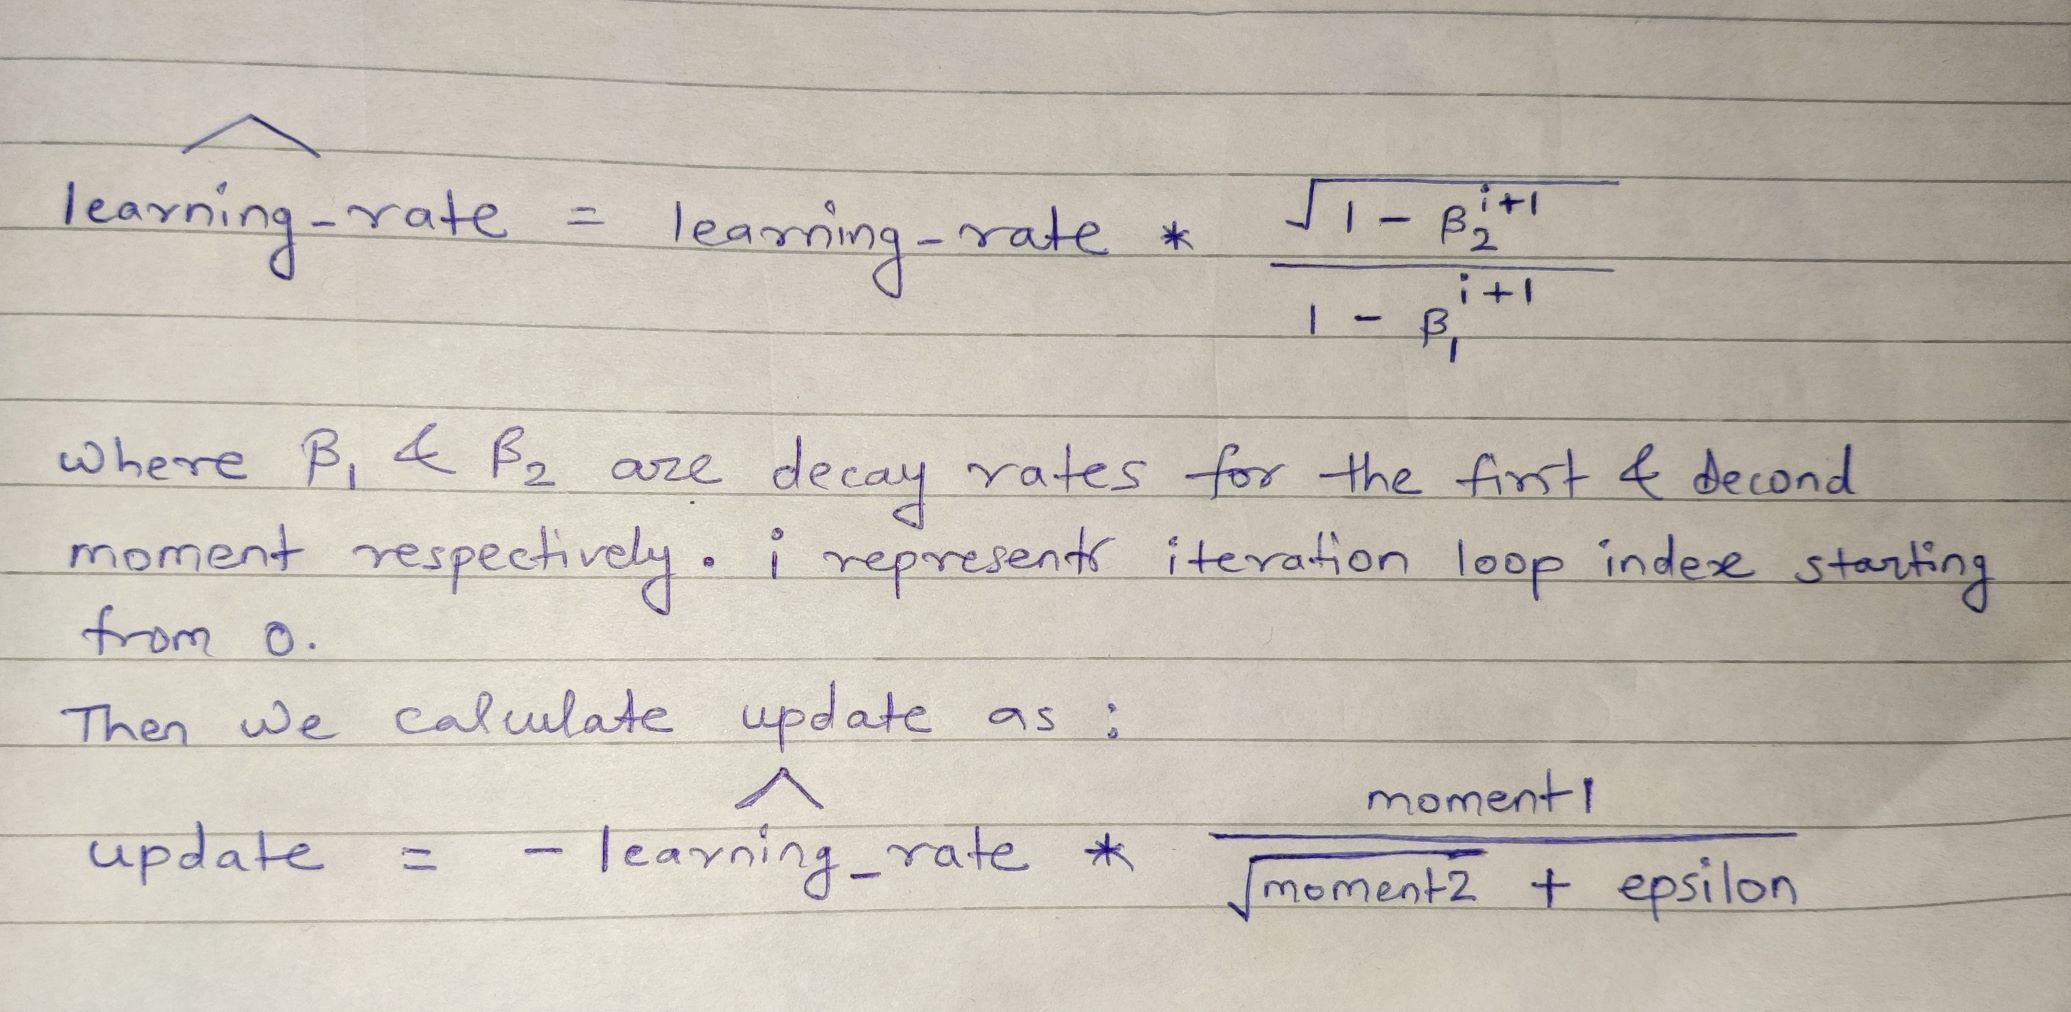

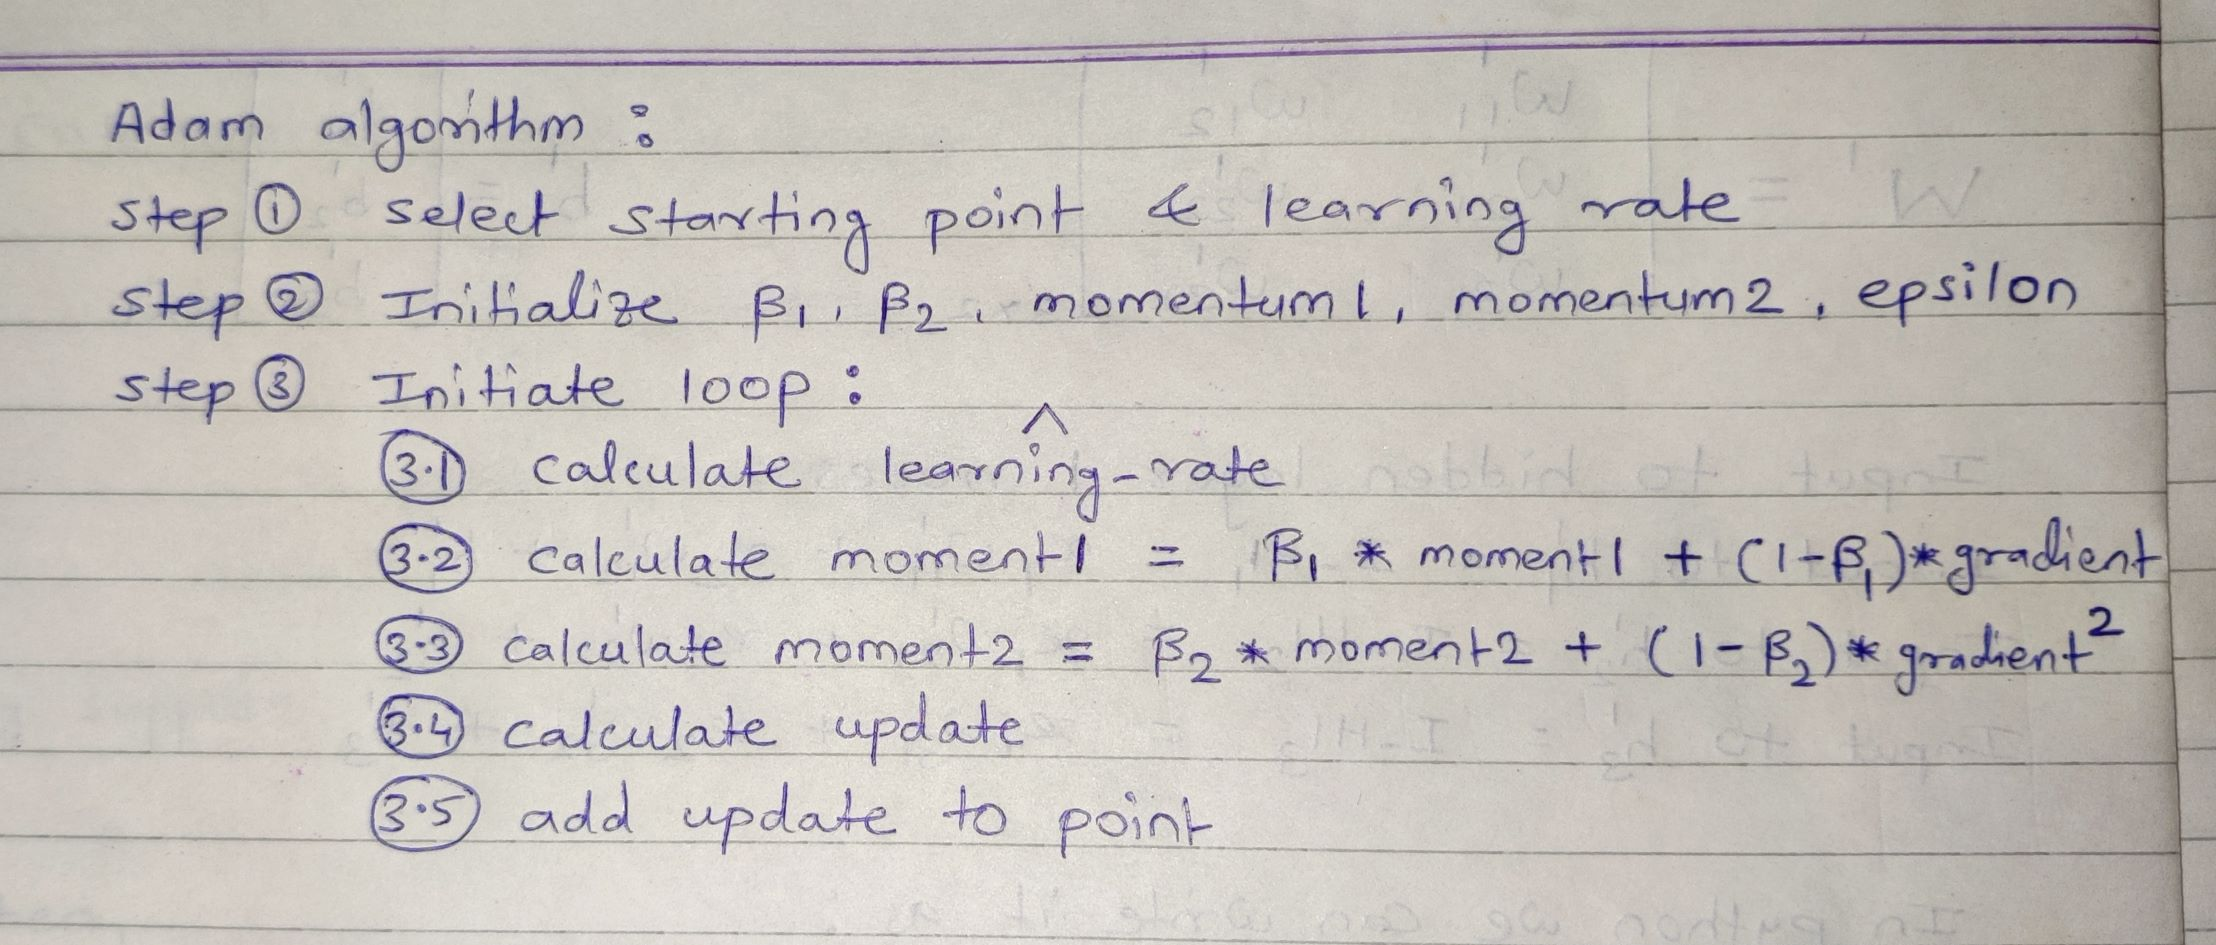

Now lets consider: <br>
  *input layer =====> Input of hidden layer_1 -----> Output of hidden layer_1 =====> hidden layer_2*

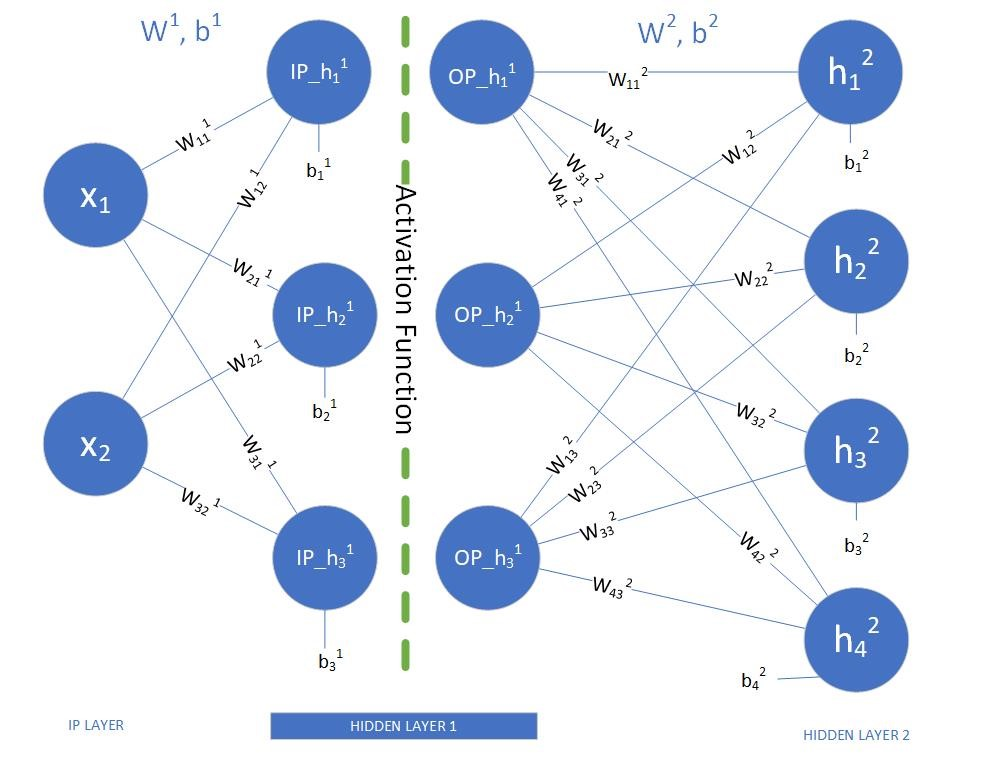

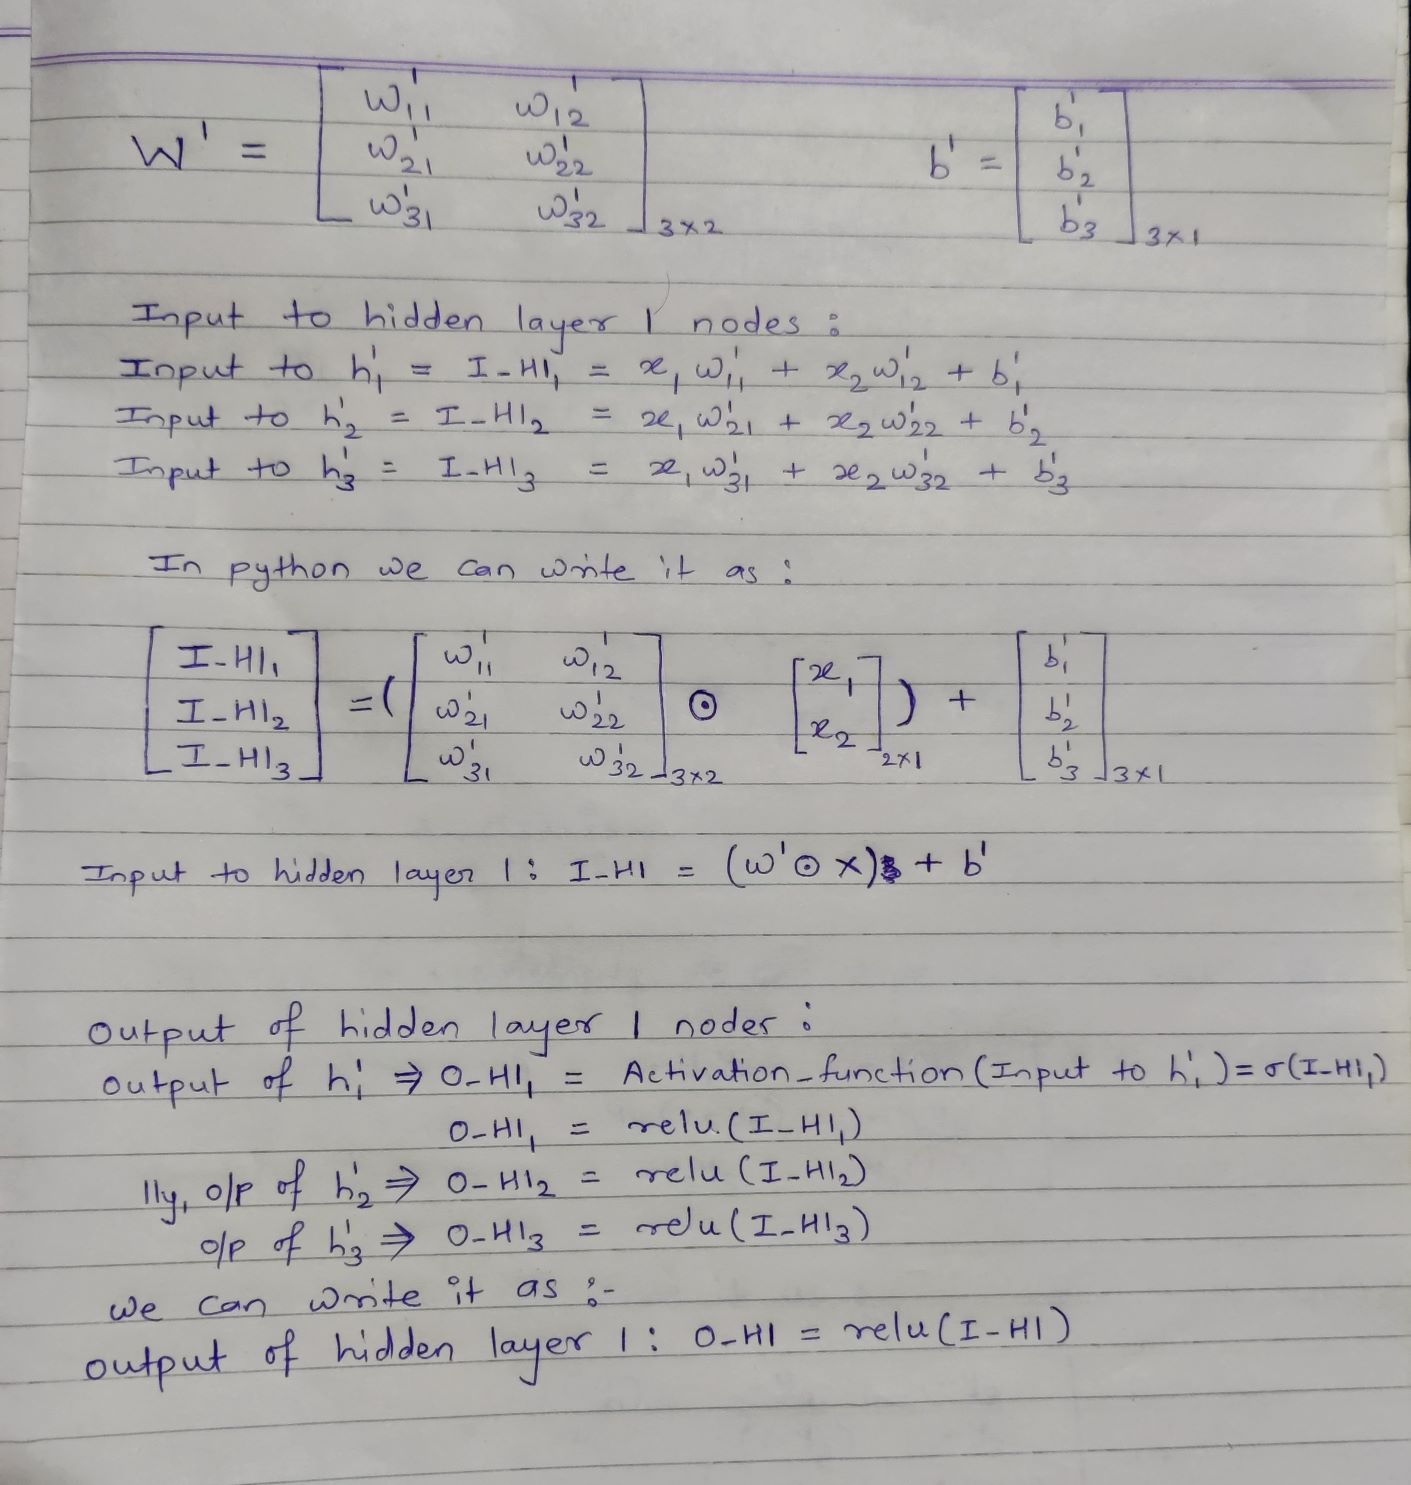

Updating parameters (weights and biases) of neural network with backpropogation:

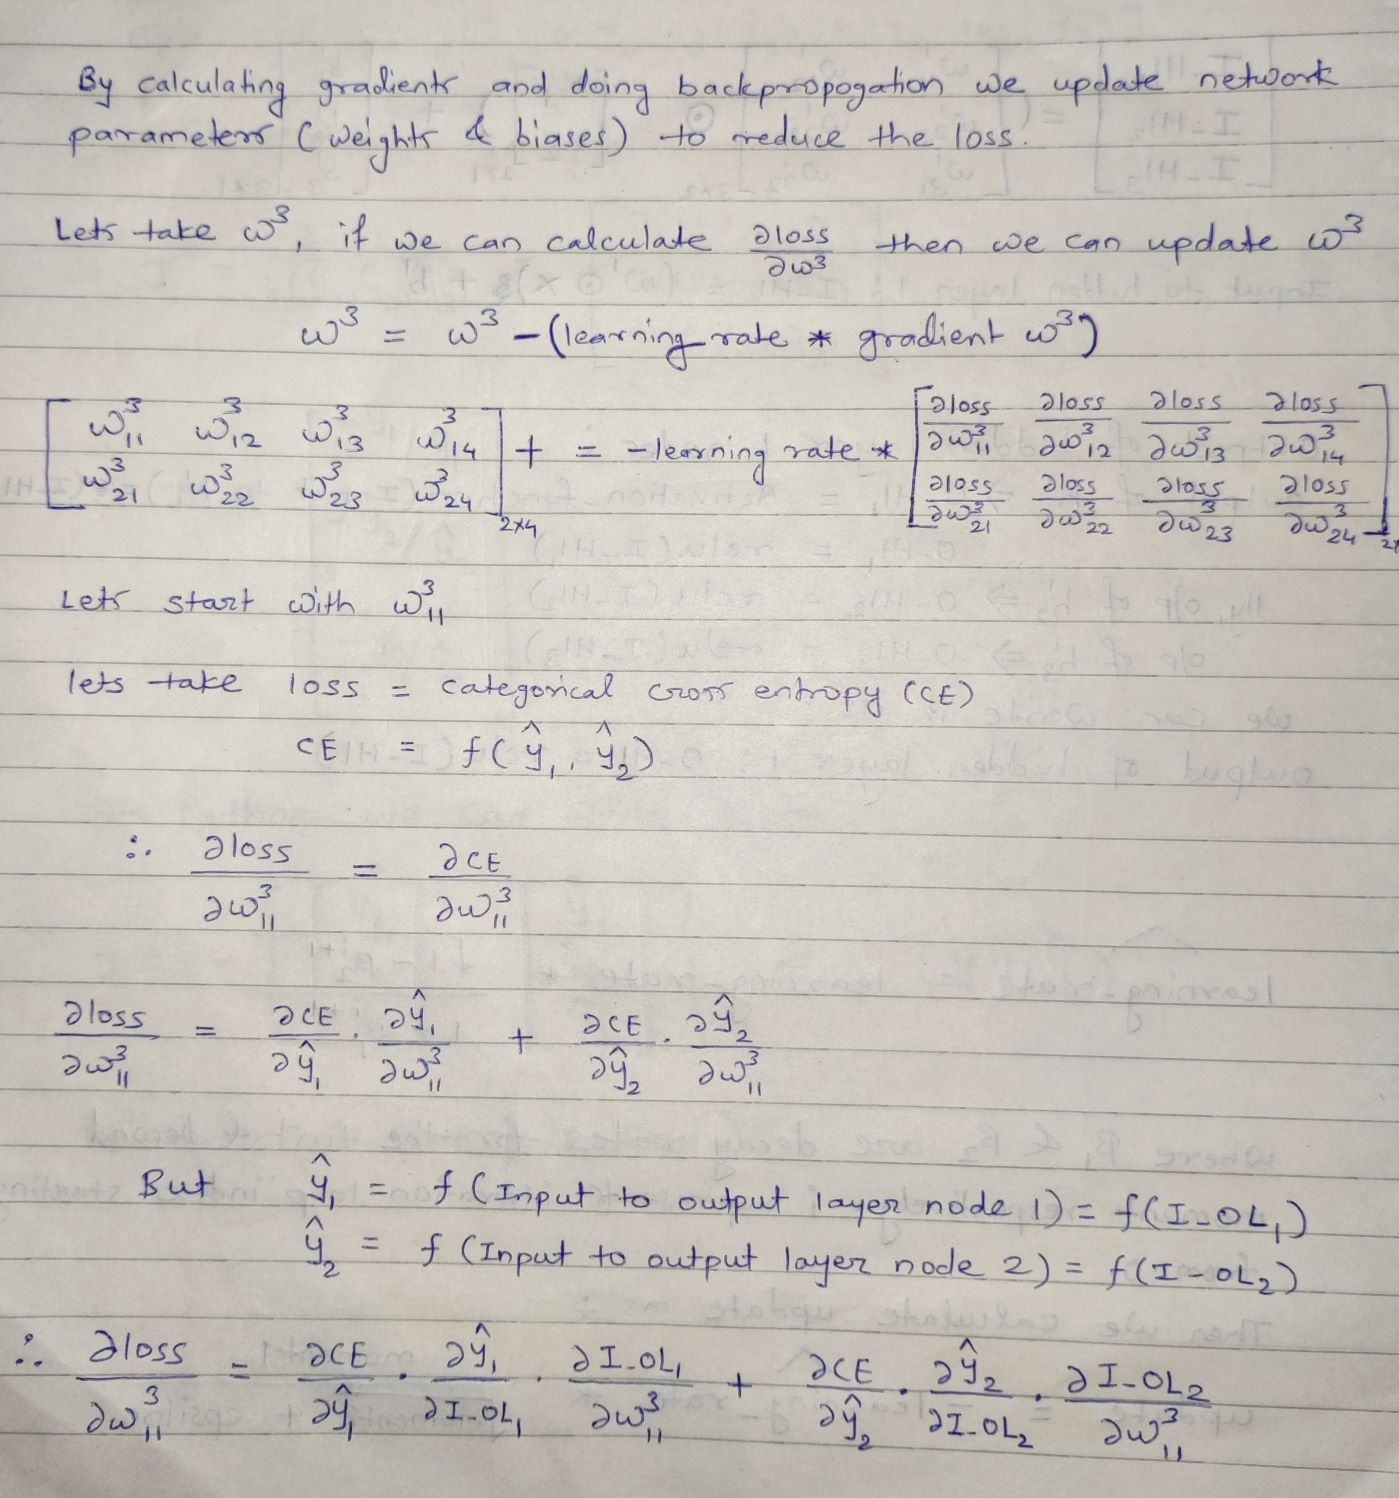

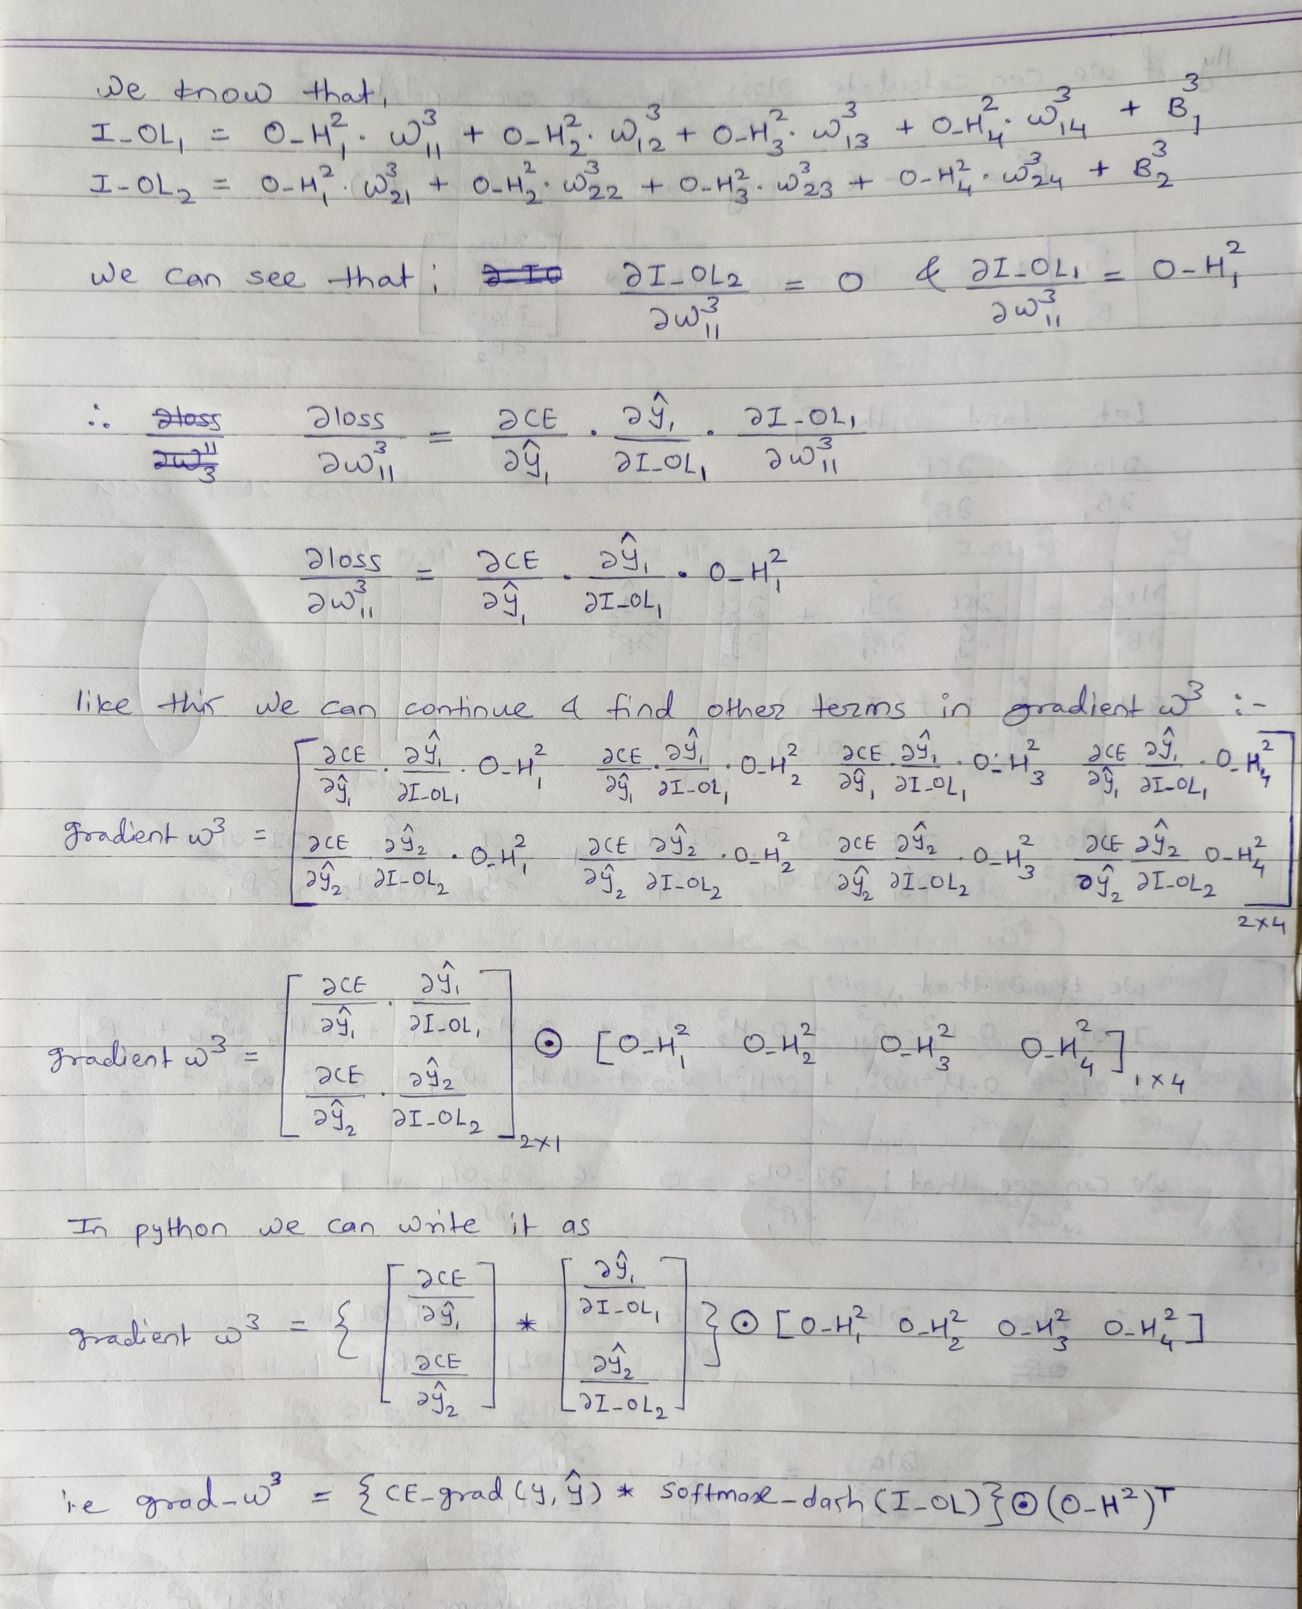

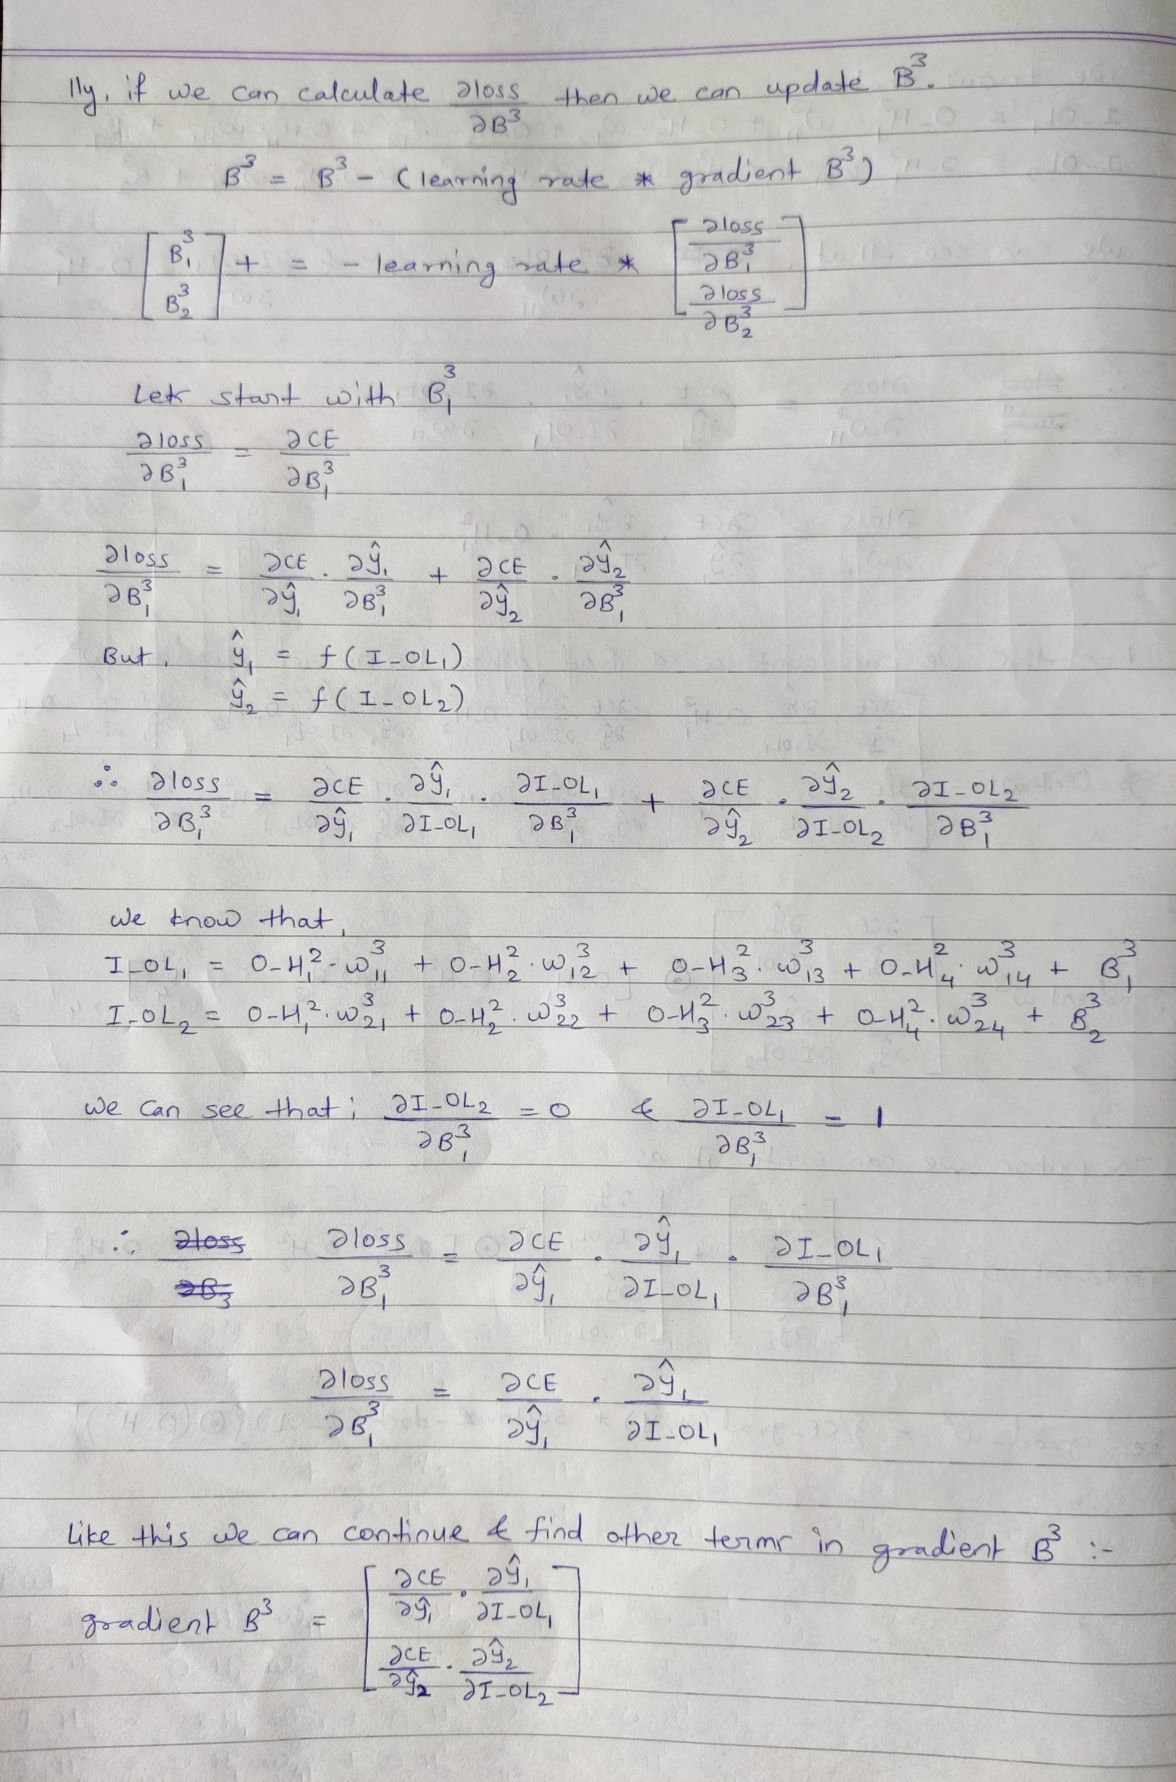

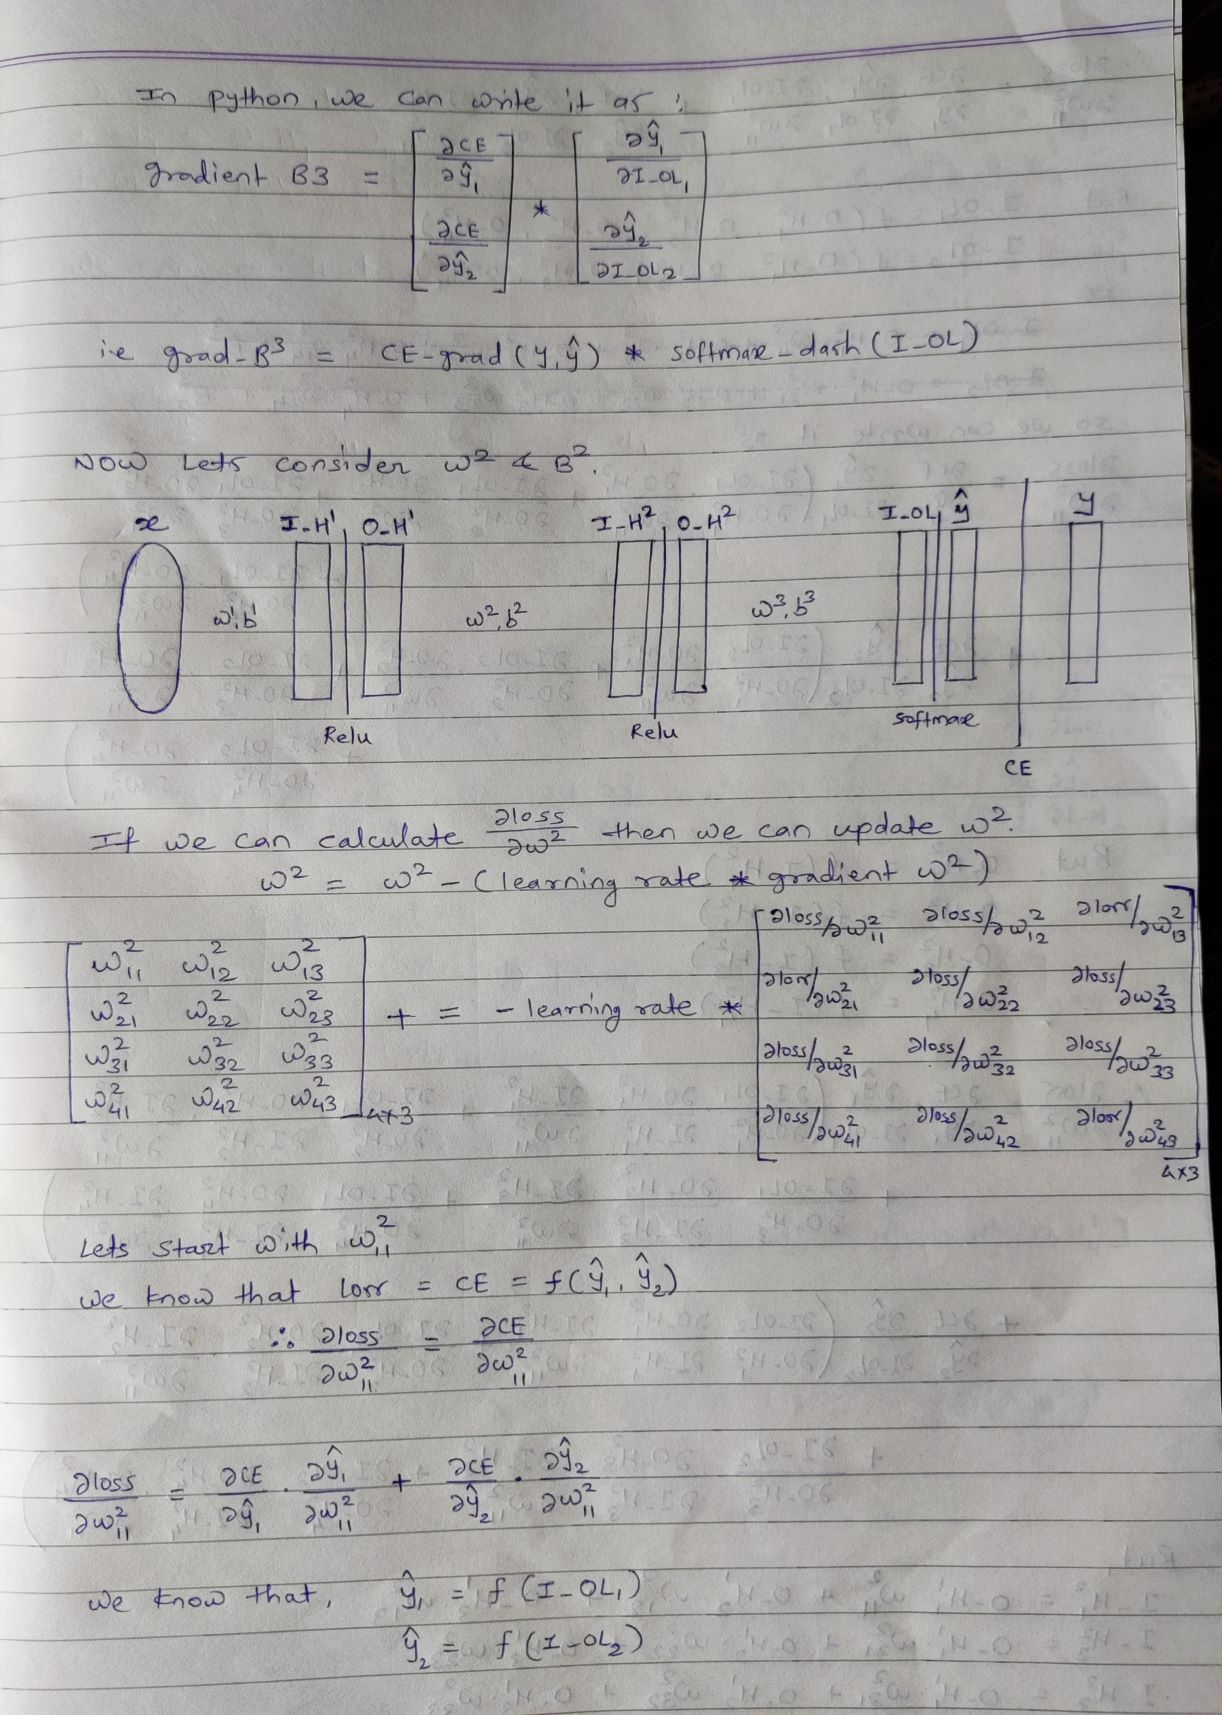

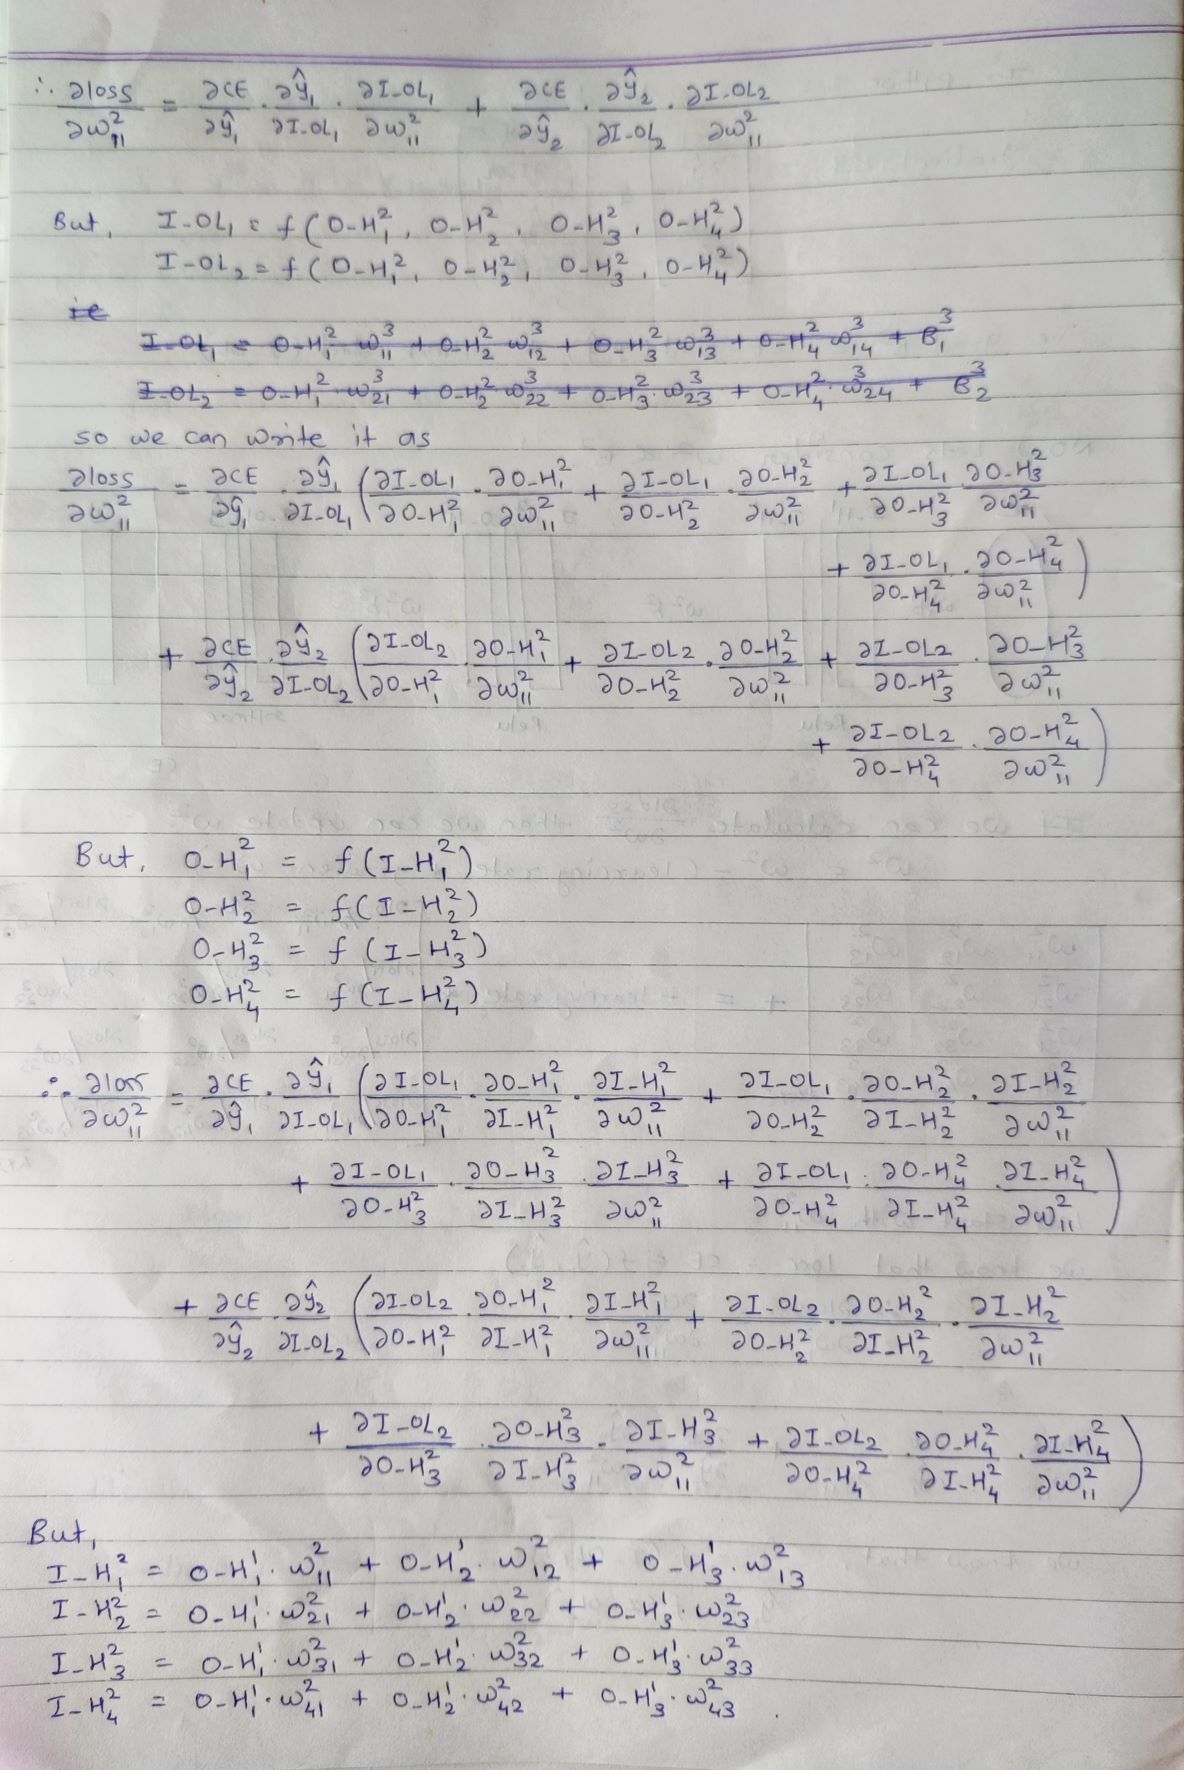

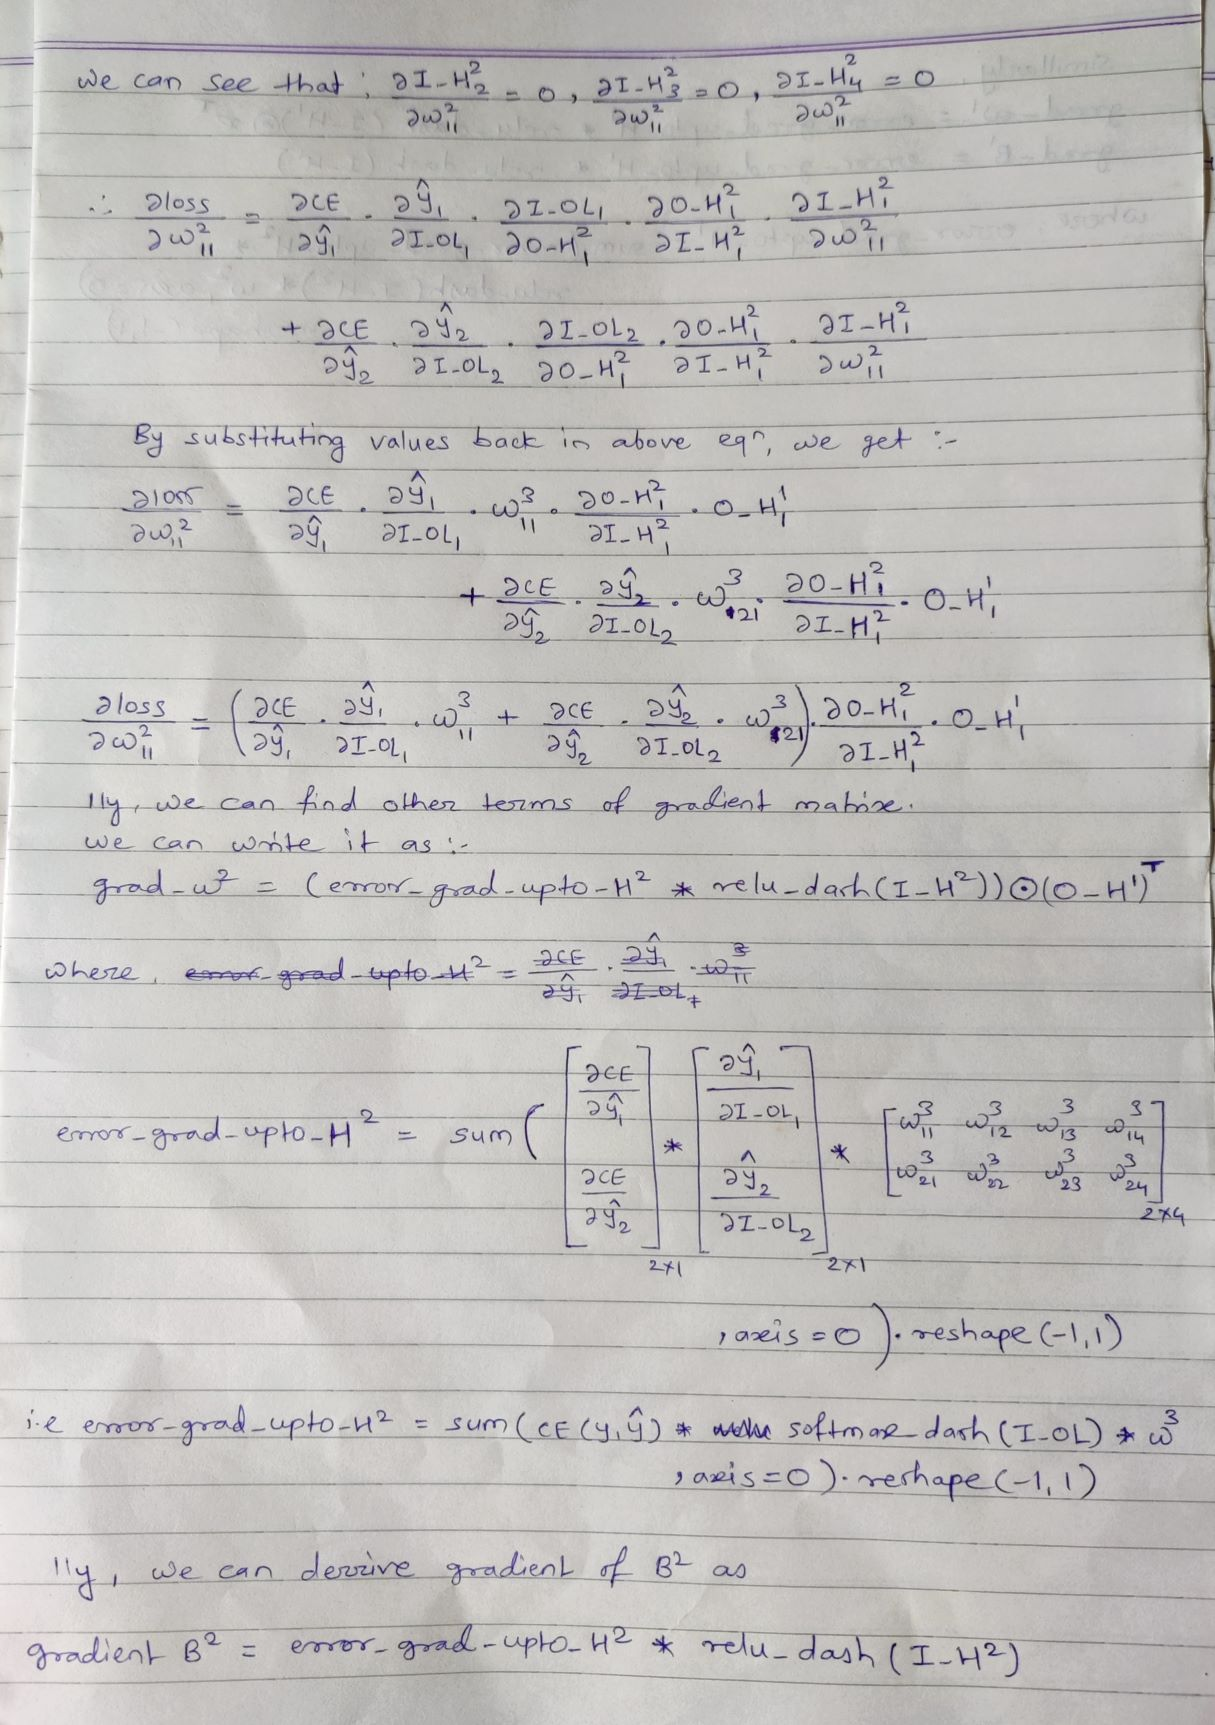

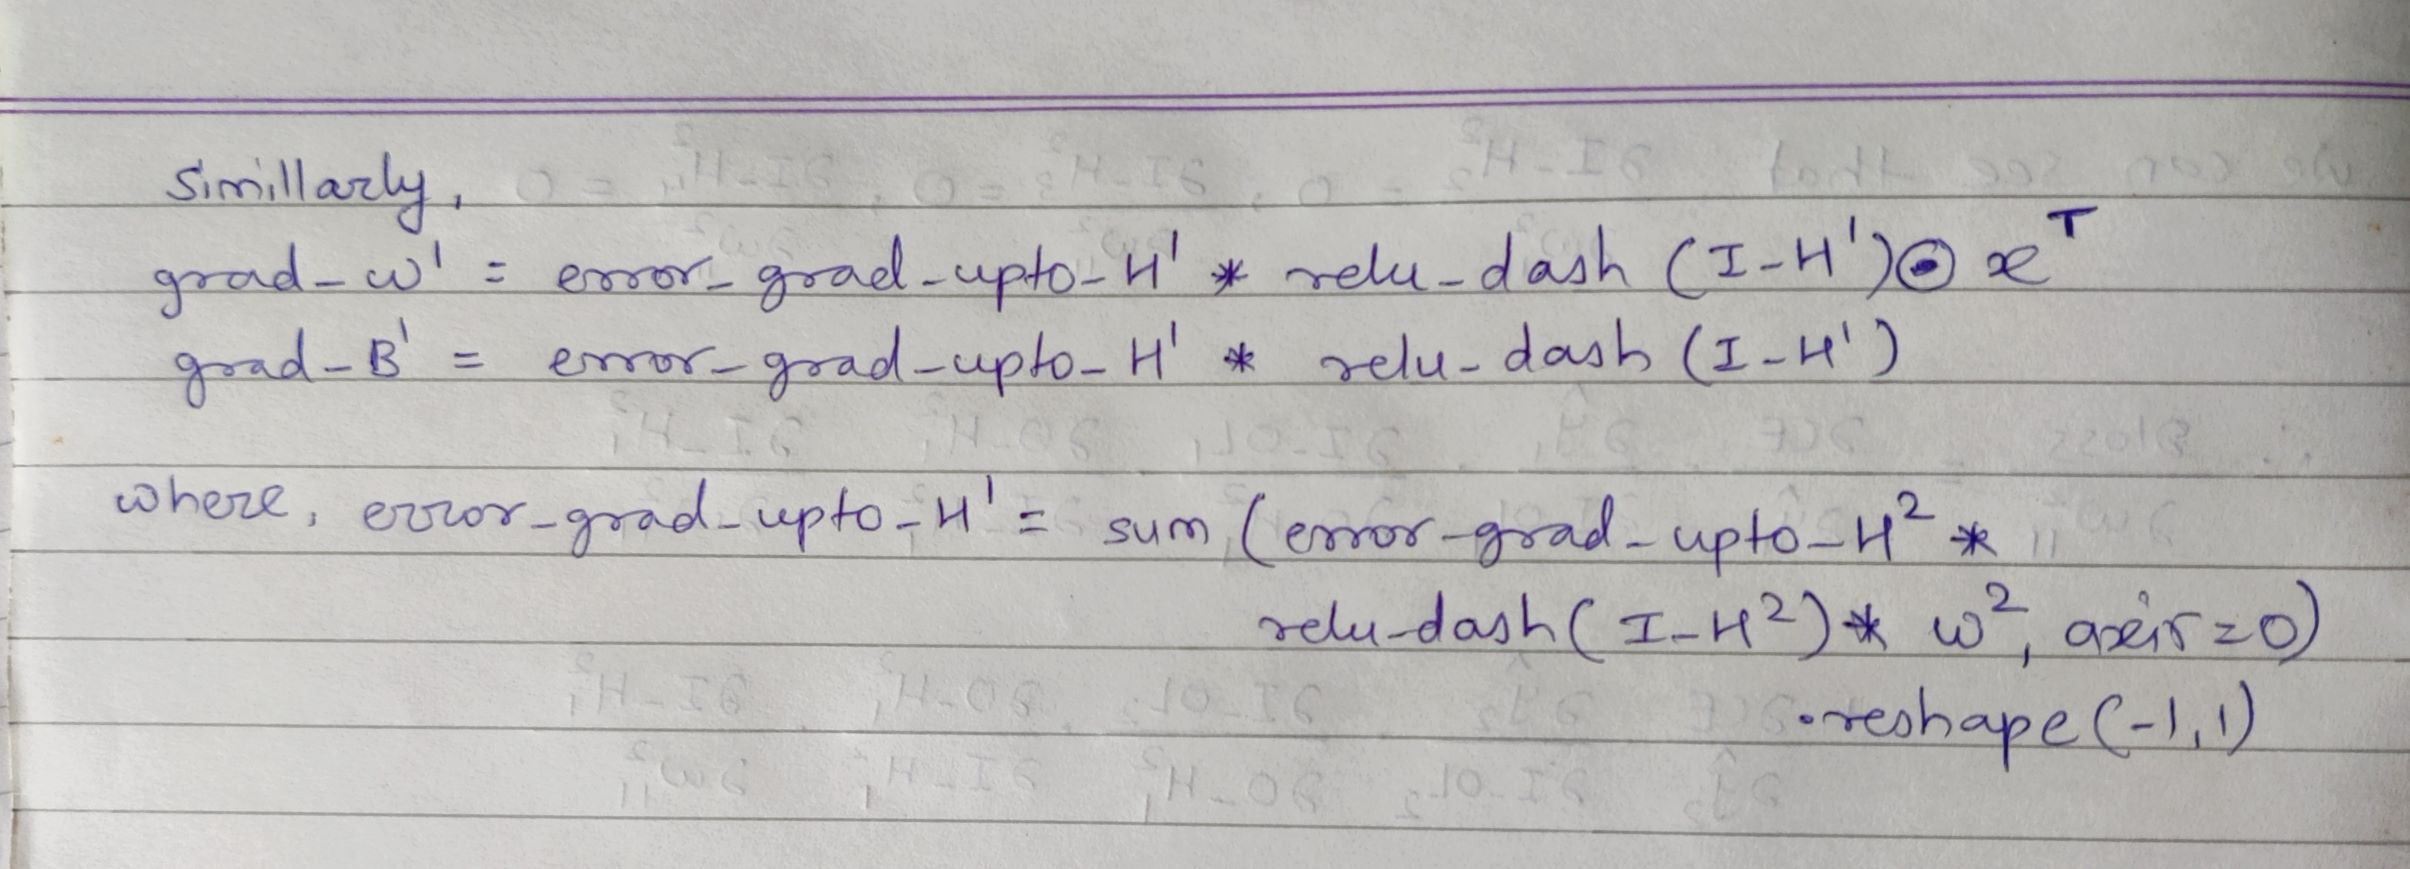

# Python Implementation :

In [24]:
# Nodes in each layer
input_nodes = 4                         
hidden_1_nodes = 15
hidden_2_nodes = 15
hidden_3_nodes = 15
output_nodes = 3

In [25]:
batch_size = 10
number_batches = int(len(train_x)/batch_size)

In [26]:
# Functions and respective derrivative function:

def relu(x):                          # ReLU
    return np.where(x <= 0, 0, x)

def relu_dash(x):                     # ReLU derivative
    return np.where(x <= 0, 0, 1)

def softmax(x):                                 # Softmax
    return np.exp(x) / np.sum(np.exp(x))

def softmax_dash(x):                            # Softmax derivative
    I = np.eye(x.shape[0])
    return softmax(x) * (I - softmax(x).T)

def cross_E(y_true, y_pred):                    # CE
    return -np.sum(y_true * np.log(y_pred + 10**-100))

def cross_E_grad(y_true, y_pred):               # CE derivative
    return -y_true/(y_pred + 10**-100)

We will initialize random normal weights, i.e., between -1 and 1 with mean = 0 and standard deviation = 1

In [27]:
w1 = np.random.normal(size = (hidden_1_nodes, input_nodes))
w1 /= np.max(abs(w1)) * 1.01

b1 = np.zeros(shape = (hidden_1_nodes, 1))

In [28]:
w2 = np.random.normal(size = (hidden_2_nodes, hidden_1_nodes))
w2 /= np.max(abs(w2)) * 1.01

b2 = np.zeros(shape = (hidden_2_nodes, 1))

In [29]:
w3 = np.random.normal(size = (hidden_3_nodes, hidden_2_nodes))
w3 /= np.max(abs(w3)) * 1.01

b3 = np.zeros(shape = (hidden_3_nodes, 1))

In [30]:
w4 = np.random.normal(size = (output_nodes, hidden_3_nodes))
w4 /= np.max(abs(w4)) * 1.01

b4 = np.zeros(shape = (output_nodes, 1))

Initializing adam optimizer parameters

In [31]:
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 10**-8

In [32]:
moment1_w1 = np.zeros(w1.shape)
moment1_b1 = np.zeros(b1.shape)

moment1_w2 = np.zeros(w2.shape)
moment1_b2 = np.zeros(b2.shape)

moment1_w3 = np.zeros(w3.shape)
moment1_b3 = np.zeros(b3.shape)

moment1_w4 = np.zeros(w4.shape)
moment1_b4 = np.zeros(b4.shape)

In [33]:
moment2_w1 = np.zeros(w1.shape)
moment2_b1 = np.zeros(b1.shape)

moment2_w2 = np.zeros(w2.shape)
moment2_b2 = np.zeros(b2.shape)

moment2_w3 = np.zeros(w3.shape)
moment2_b3 = np.zeros(b3.shape)

moment2_w4 = np.zeros(w4.shape)
moment2_b4 = np.zeros(b4.shape)

In [34]:
adam_iter = 1

Model training:

In [35]:
train_data = np.concatenate((train_x, train_y), axis = 1)
train_data.shape

(100, 7, 1)

In [36]:
epochs = 9

In [37]:
loss_accumulator = []                  # train loss accumulator
val_loss_accumulator = []              # validation loss accumulator
acc_accumulator = []                   # train accuracy accumulator
val_acc_accumulator = []               # validation accuracy accumulator

In [38]:
for epoch in range(epochs):
    avg_loss = 0
    avg_acc = 0
    
    np.random.shuffle(train_data)      # data shuffling
    train_x = train_data[:, :4, :]
    train_y = train_data[:, 4:, :]
    
    for batch in range(number_batches):
        loss = 0
        
        sample = batch * batch_size
        
        grad_w1 = 0
        grad_b1 = 0
        
        grad_w2 = 0
        grad_b2 = 0
        
        grad_w3 = 0
        grad_b3 = 0
        
        grad_w4 = 0
        grad_b4 = 0
        
        count = 0
        
        for iteration in range(batch_size):
            
            #--------------------Forward propagation in batch---------------
            in_hidden_1 = w1.dot(train_x[sample]) + b1
            out_hidden_1 = relu(in_hidden_1)

            in_hidden_2 = w2.dot(out_hidden_1) + b2
            out_hidden_2 = relu(in_hidden_2)

            in_hidden_3 = w3.dot(out_hidden_2) + b3
            out_hidden_3 = relu(in_hidden_3)

            in_output_layer = w4.dot(out_hidden_3) + b4
            y_hat = softmax(in_output_layer)
            
            #--------------------Accuracy-----------------------------------
            
            if np.argmax(y_hat) == np.argmax(train_y[sample]):
                count += 1
            
            #--------------------Collecting loss ------------------------

            loss += cross_E(train_y[sample], y_hat)
            
            #--------------------Collecting gradients---------------------
            
            error_upto_softmax_H4 = np.sum(cross_E_grad(train_y[sample], y_hat) * softmax_dash(in_output_layer), 
                                           axis = 0).reshape((-1, 1))
    
            grad_w4 += error_upto_softmax_H4 .dot( out_hidden_3.T )

            grad_b4 += error_upto_softmax_H4

            #-----------------------------------------

            error_grad_H3 = np.sum(error_upto_softmax_H4 * w4, axis = 0) .reshape((-1, 1))

            grad_w3 += error_grad_H3 * relu_dash(in_hidden_3) .dot( out_hidden_2.T )

            grad_b3 += error_grad_H3 * relu_dash(in_hidden_3)

            #-----------------------------------------

            error_grad_H2 = np.sum(error_grad_H3 * relu_dash(in_hidden_3) * w3, axis = 0) .reshape((-1, 1))

            grad_w2 += error_grad_H2 * relu_dash(in_hidden_2) .dot( out_hidden_1.T )

            grad_b2 += error_grad_H2 * relu_dash(in_hidden_2)
            
            #-----------------------------------------
            
            error_grad_H1 = np.sum(error_grad_H2 * relu_dash(in_hidden_2) * w2, axis = 0) .reshape((-1, 1))

            grad_w1 += error_grad_H1 * relu_dash(in_hidden_1) .dot( train_x[sample].T )

            grad_b1 += error_grad_H1 * relu_dash(in_hidden_1)
            
            #---------------------------------------------
            
            sample += 1
            
        #-----------------------Updating weights and biases with Adam---------------------------------
        
        learning_rate_hat = learning_rate * np.sqrt(1 - beta2**(adam_iter)) / (1 - beta1**(adam_iter))
        adam_iter += 1
        
        moment1_w1 = beta1 * moment1_w1 + (1 - beta1) * (grad_w1/batch_size)
        moment2_w1 = beta2 * moment2_w1 + (1 - beta2) * (grad_w1/batch_size)**2
        update_w1 = - learning_rate_hat * moment1_w1 / (np.sqrt(moment2_w1) + epsilon)
        w1 += update_w1      

        moment1_b1 = beta1 * moment1_b1 + (1 - beta1) * (grad_b1/batch_size)
        moment2_b1 = beta2 * moment2_b1 + (1 - beta2) * (grad_b1/batch_size)**2
        update_b1 = - learning_rate_hat * moment1_b1 / (np.sqrt(moment2_b1) + epsilon)
        b1 += update_b1 

        moment1_w2 = beta1 * moment1_w2 + (1 - beta1) * (grad_w2/batch_size)
        moment2_w2 = beta2 * moment2_w2 + (1 - beta2) * (grad_w2/batch_size)**2
        update_w2 = - learning_rate_hat * moment1_w2 / (np.sqrt(moment2_w2) + epsilon)
        w2 += update_w2

        moment1_b2 = beta1 * moment1_b2 + (1 - beta1) * (grad_b2/batch_size)
        moment2_b2 = beta2 * moment2_b2 + (1 - beta2) * (grad_b2/batch_size)**2
        update_b2 = - learning_rate_hat * moment1_b2 / (np.sqrt(moment2_b2) + epsilon)
        b2 += update_b2

        moment1_w3 = beta1 * moment1_w3 + (1 - beta1) * (grad_w3/batch_size)
        moment2_w3 = beta2 * moment2_w3 + (1 - beta2) * (grad_w3/batch_size)**2
        update_w3 = - learning_rate_hat * moment1_w3 / (np.sqrt(moment2_w3) + epsilon)
        w3 += update_w3

        moment1_b3 = beta1 * moment1_b3 + (1 - beta1) * (grad_b3/batch_size)
        moment2_b3 = beta2 * moment2_b3 + (1 - beta2) * (grad_b3/batch_size)**2
        update_b3 = - learning_rate_hat * moment1_b3 / (np.sqrt(moment2_b3) + epsilon)
        b3 += update_b3
        
        moment1_w4 = beta1 * moment1_w4 + (1 - beta1) * (grad_w4/batch_size)
        moment2_w4 = beta2 * moment2_w4 + (1 - beta2) * (grad_w4/batch_size)**2
        update_w4 = - learning_rate_hat * moment1_w4 / (np.sqrt(moment2_w4) + epsilon)
        w4 += update_w4

        moment1_b4 = beta1 * moment1_b4 + (1 - beta1) * (grad_b4/batch_size)
        moment2_b4 = beta2 * moment2_b4 + (1 - beta2) * (grad_b4/batch_size)**2
        update_b4 = - learning_rate_hat * moment1_b4 / (np.sqrt(moment2_b4) + epsilon)
        b4 += update_b4
        
        #-----------------------------------------------------
            
        avg_loss += loss/batch_size
        avg_acc += count/batch_size
        
        print(f'average loss before training of batch number {batch + 1} is {loss/batch_size} -- epoch number {epoch + 1}')
        print(f'average accuracy before training of batch number {batch + 1} is {count/batch_size} -- epoch number {epoch + 1}')
        print('\n')
        
    print('-------------------------')    
    print(f'average loss of batches is {avg_loss/number_batches} -- epoch number {epoch + 1}')
    print(f'average accuracy of batches is {avg_acc/number_batches} -- epoch number {epoch + 1}')
    
    loss_accumulator.append(avg_loss/number_batches)
    acc_accumulator.append(avg_acc/number_batches)
    
    print('-------------------------')
    
    val_loss = 0
    val_count = 0
    
    for val in range(30):
        in_hidden_1 = w1.dot(val_x[val]) + b1
        out_hidden_1 = relu(in_hidden_1)

        in_hidden_2 = w2.dot(out_hidden_1) + b2
        out_hidden_2 = relu(in_hidden_2)

        in_hidden_3 = w3.dot(out_hidden_2) + b3
        out_hidden_3 = relu(in_hidden_3)

        in_output_layer = w4.dot(out_hidden_3) + b4
        y_hat = softmax(in_output_layer)
        
        #-----------------Validation set accuracy--------------------
        
        if np.argmax(y_hat) == np.argmax(val_y[val]):
            val_count += 1
            
        #--------------------Collecting validation loss---------------

        val_loss += cross_E(val_y[val], y_hat)
    
    print(f'average loss of validation set is {val_loss/30} -- epoch number {epoch + 1}')
    print(f'accuracy of validation set is {val_count/30} -- epoch number {epoch + 1}')
    
    val_loss_accumulator.append(val_loss/30)
    val_acc_accumulator.append(val_count/30)
    
    print('-------------------------')
    print('\n')

average loss before training of batch number 1 is 6.103417578689756 -- epoch number 1
average accuracy before training of batch number 1 is 0.0 -- epoch number 1


average loss before training of batch number 2 is 1.2117892889463124 -- epoch number 1
average accuracy before training of batch number 2 is 0.4 -- epoch number 1


average loss before training of batch number 3 is 1.104751761739764 -- epoch number 1
average accuracy before training of batch number 3 is 0.7 -- epoch number 1


average loss before training of batch number 4 is 0.962359496926482 -- epoch number 1
average accuracy before training of batch number 4 is 0.5 -- epoch number 1


average loss before training of batch number 5 is 1.14131705413465 -- epoch number 1
average accuracy before training of batch number 5 is 0.1 -- epoch number 1


average loss before training of batch number 6 is 1.1420838593209157 -- epoch number 1
average accuracy before training of batch number 6 is 0.4 -- epoch number 1


average loss be

average loss before training of batch number 7 is 0.16168022304945545 -- epoch number 8
average accuracy before training of batch number 7 is 0.9 -- epoch number 8


average loss before training of batch number 8 is 0.13709142228133747 -- epoch number 8
average accuracy before training of batch number 8 is 1.0 -- epoch number 8


average loss before training of batch number 9 is 0.42297334350933424 -- epoch number 8
average accuracy before training of batch number 9 is 0.8 -- epoch number 8


average loss before training of batch number 10 is 0.20465199808219775 -- epoch number 8
average accuracy before training of batch number 10 is 0.9 -- epoch number 8


-------------------------
average loss of batches is 0.21021265066286549 -- epoch number 8
average accuracy of batches is 0.9100000000000001 -- epoch number 8
-------------------------
average loss of validation set is 0.09421368453554148 -- epoch number 8
accuracy of validation set is 0.9666666666666667 -- epoch number 8
----------

Training and validation loss vs epoch plot:

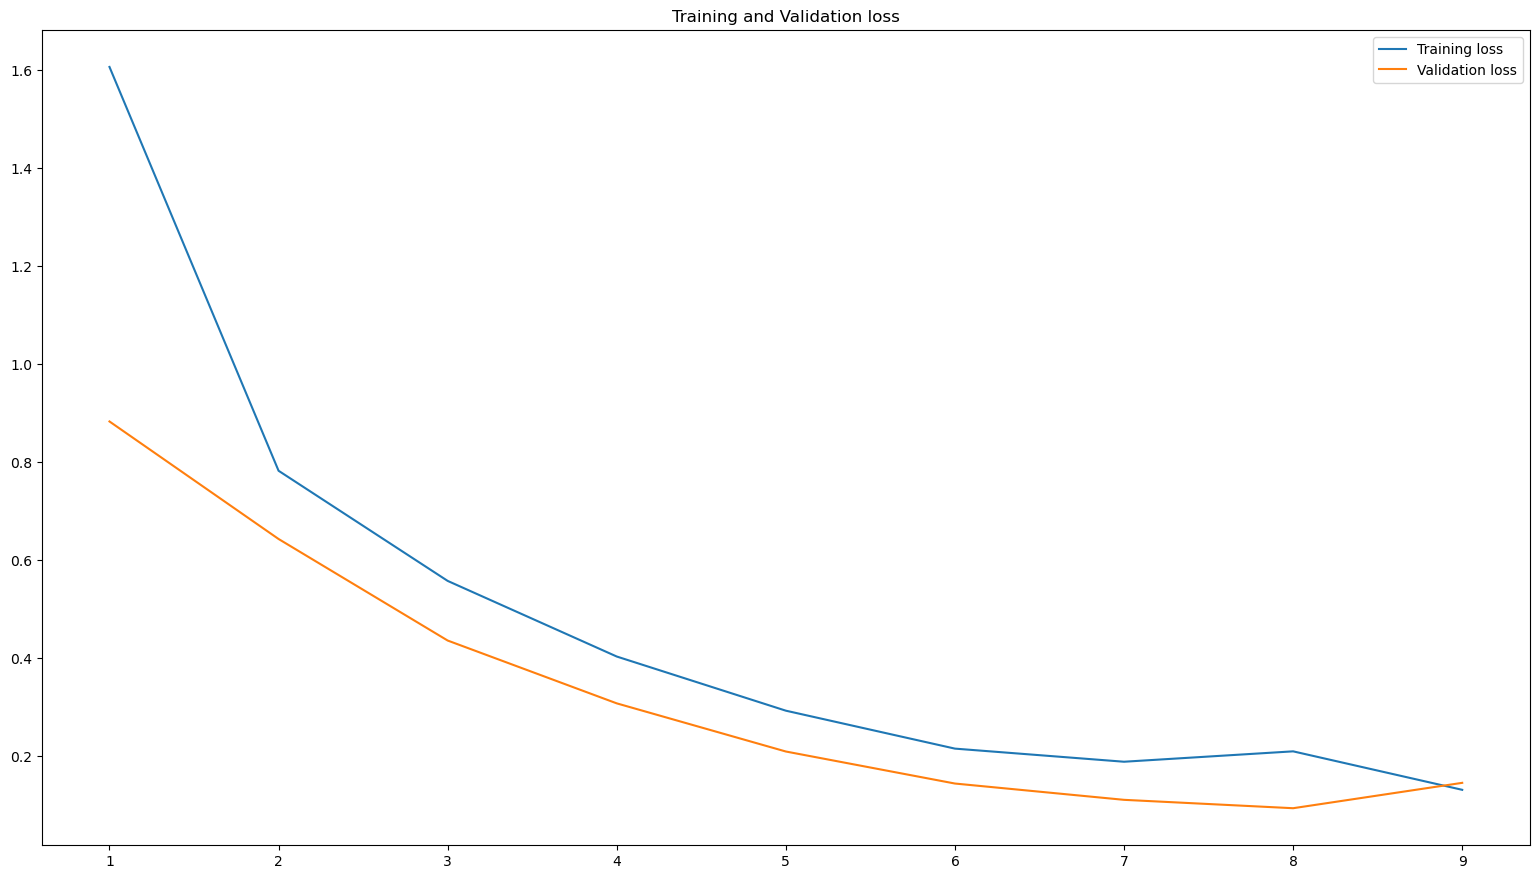

In [39]:
EPOCH = [i for i in range(1, epochs + 1)]
fig = plt.figure(dpi = 100)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

ax = plt.axes()

ax.plot(EPOCH, loss_accumulator, label='Training loss')
ax.plot(EPOCH, val_loss_accumulator, label='Validation loss')
ax.set_title('Training and Validation loss')
ax.legend()
plt.show()

Training and validation accuracy vs epoch plot:

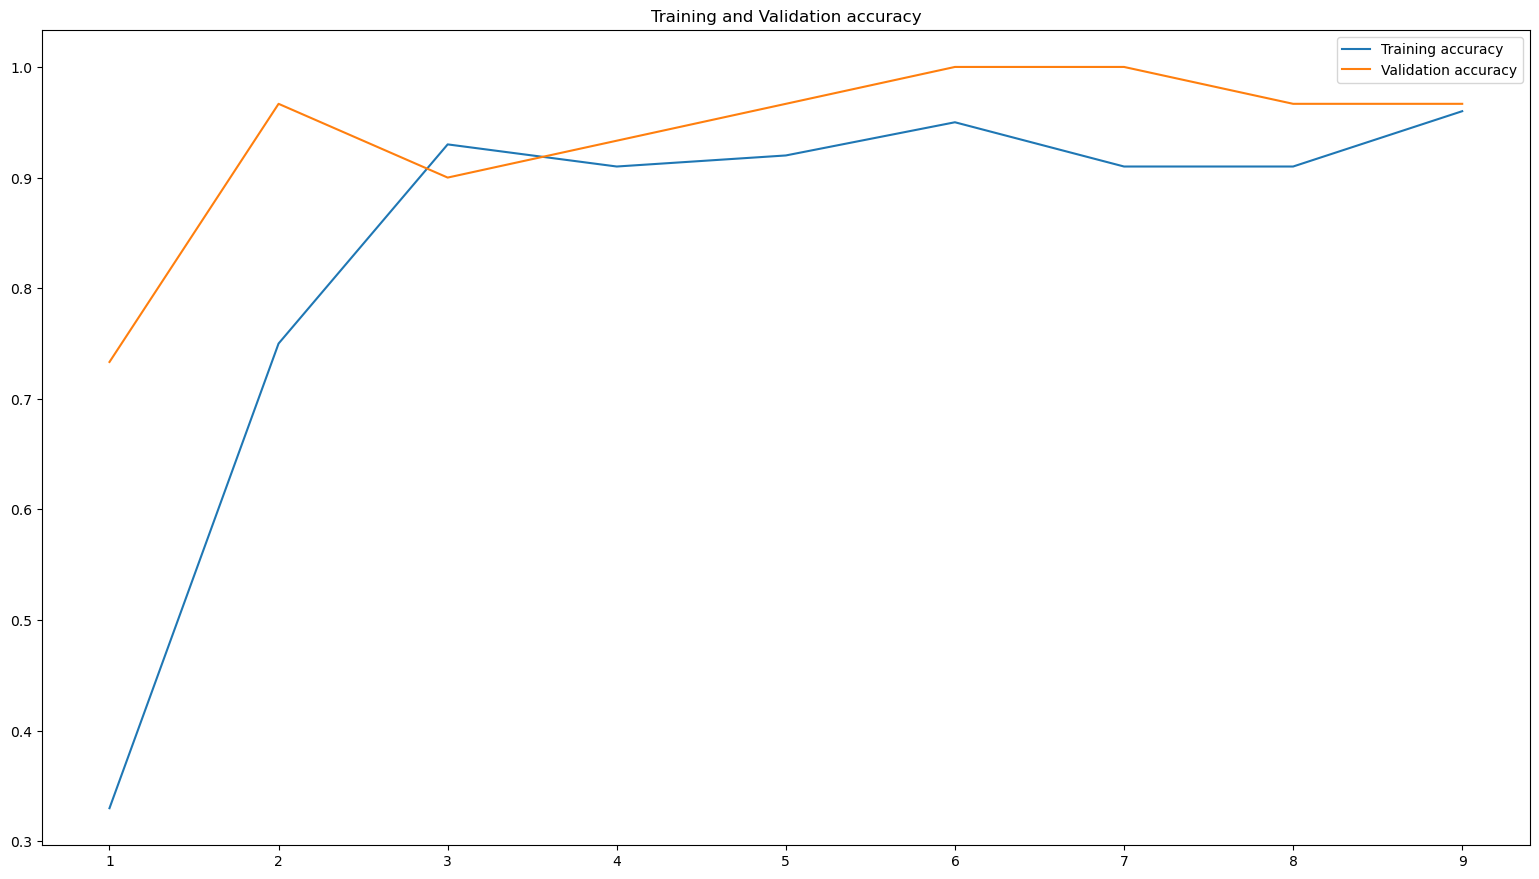

In [40]:
fig = plt.figure(dpi = 100)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

ax = plt.axes()

ax.plot(EPOCH, acc_accumulator, label='Training accuracy')
ax.plot(EPOCH, val_acc_accumulator, label='Validation accuracy')
ax.set_title('Training and Validation accuracy')
ax.legend()
plt.show()

Model performance on Test data:

In [41]:
# True labels:
true = np.argmax(test_y, axis = 1).reshape((-1,))
true

array([0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0],
      dtype=int64)

In [42]:
# Predicted labels:
pred = []
for test in test_x:
    in_hidden_1 = w1.dot(test) + b1
    out_hidden_1 = relu(in_hidden_1)

    in_hidden_2 = w2.dot(out_hidden_1) + b2
    out_hidden_2 = relu(in_hidden_2)

    in_hidden_3 = w3.dot(out_hidden_2) + b3
    out_hidden_3 = relu(in_hidden_3)

    in_output_layer = w4.dot(out_hidden_3) + b4
    y_hat = softmax(in_output_layer)
    
    pred.append(np.argmax(y_hat))

pred = np.array(pred)
pred

array([0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0],
      dtype=int64)

Creating confusion matrix:

In [43]:
class_labels = [[np.nan, 0, 1, 2]]
for i in range(3):
    class_labels.append([i, 0, 0, 0])
np.array(class_labels)

array([[nan,  0.,  1.,  2.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.]])

In [44]:
for i in range(len(true)):
    class_labels[true[i] + 1][pred[i] + 1] += 1
    
np.array(class_labels)

array([[nan,  0.,  1.,  2.],
       [ 0.,  7.,  0.,  0.],
       [ 1.,  0.,  4.,  1.],
       [ 2.,  0.,  0.,  8.]])

In [45]:
print('end')

end
